# Lending Club Case Study

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data in the csv file 
df = pd.read_csv('loan.csv')

In [3]:
# Finding the shape of the dataframe
df.shape

(39717, 111)

In [4]:
# Taking a look at the sample data
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Understanding and Data Cleaning

In [5]:
# Making a list of columns with all values as nulls
columns_with_all_nulls = df.columns[df.isnull().all()].tolist()
print(len(columns_with_all_nulls))
print(columns_with_all_nulls)

54
['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_cred

In [6]:
# Dropping those columns with all values as nulls from the dataframe
loan_df = df.drop(columns = columns_with_all_nulls)

In [7]:
# Rechecking the shape of the dataframe after dropping columns
loan_df.shape

(39717, 57)

In [8]:
# Checking for columns with all single unique values as they will not contribute to our analysis
single_value_columns = loan_df.columns[loan_df.apply(lambda x: x.nunique() == 1)]
print(len(single_value_columns))
print(single_value_columns)

loan_df = loan_df.drop(columns = single_value_columns)

9
Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [9]:
# Rechecking the shape of the dataframe after dropping columns
loan_df.shape

(39717, 48)

In [10]:
# Removing Descriptive columns and some ids which may not be relevant in the analysis
cols_to_drop = ['member_id', 'url', 'desc', 'zip_code', 'emp_title', 'title']
loan_df = loan_df.drop(columns = cols_to_drop)

In [11]:
# Checking for the total % of null records for the columns
100*loan_df.isnull().mean()

id                          0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.662487
mths_since_last_record     92.985372
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
revol_util                  0.125891
t

In [12]:
# Dropping columns with high % of null records
cols_to_drop = ['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq']
loan_df = loan_df.drop(columns = cols_to_drop)

In [13]:
# Rechecking the shape of the dataframe after dropping columns
loan_df.shape

(39717, 39)

In [14]:
# Dropping a few more num_cols which don't seem relevant in the analysis
num_cols_to_drop = ['collection_recovery_fee', 'funded_amnt', 'funded_amnt_inv', 'recoveries', 'revol_bal', 'total_pymnt', 
                    'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'last_pymnt_d', 'last_credit_pull_d', 
                    'last_pymnt_amnt', 'total_pymnt_inv', 'earliest_cr_line']
loan_df = loan_df.drop(columns = num_cols_to_drop)

In [15]:
# Checking for the total % of null records for the remaining columns
100*loan_df.isnull().mean()

id                      0.000000
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.125891
total_acc               0.000000
out_prncp               0.000000
out_prncp_inv           0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

In [16]:
# Checking for pub_rec_bankruptcies values
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [17]:
# Updating the nulls in pub_rec_bankruptcies column with -1 which would denote 'Not known'
loan_df['pub_rec_bankruptcies'].fillna(-1, inplace = True)
loan_df['pub_rec_bankruptcies'].value_counts()

 0.0    37339
 1.0     1674
-1.0      697
 2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [18]:
# Imputing 'NA' for missing emp_length values
loan_df['emp_length'].fillna('NA', inplace = True)
loan_df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
NA           1075
Name: emp_length, dtype: int64

In [19]:
# Checking for the total null records for all columns
loan_df.isnull().sum()

id                       0
loan_amnt                0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
emp_length               0
home_ownership           0
annual_inc               0
verification_status      0
issue_d                  0
loan_status              0
purpose                  0
addr_state               0
dti                      0
delinq_2yrs              0
inq_last_6mths           0
open_acc                 0
pub_rec                  0
revol_util              50
total_acc                0
out_prncp                0
out_prncp_inv            0
pub_rec_bankruptcies     0
dtype: int64

In [20]:
# Removing records which have nulls in revol_util, last_pymnt_d, last_credit_pull_d  columns
null_col = ['revol_util']
loan_df = loan_df[~loan_df[null_col].isnull().any(axis = 1)]

In [21]:
# Checking for the total null records for all columns - There should be no null columns now
loan_df.isnull().sum()

id                      0
loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_util              0
total_acc               0
out_prncp               0
out_prncp_inv           0
pub_rec_bankruptcies    0
dtype: int64

In [22]:
# Considering that we are evaluating the patters for loan defaulters and customers with loans paid off, loan_status = 'Current' 
# does not hold value in the analysis. Hence removing such rows.
loan_df = loan_df[loan_df['loan_status'] != 'Current']

In [23]:
# Checking values for int_rate column
loan_df['int_rate'].info

<bound method Series.info of 0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38527, dtype: object>

In [24]:
# Removing the % sign from the column and typecasting it to numeric datatype
loan_df['int_rate'] = pd.to_numeric(loan_df['int_rate'].str.replace('%', ''))

In [25]:
# Checking stats for int_rate columns after data cleaning
loan_df['int_rate'].describe()

count    38527.000000
mean        11.927378
std          3.690161
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

In [26]:
# Checking values for revol_util column
loan_df['revol_util'].info

<bound method Series.info of 0        83.70%
1         9.40%
2        98.50%
3           21%
5        28.30%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 38527, dtype: object>

In [27]:
# Removing the % sign from the column and typecasting it to numeric datatype
loan_df['revol_util'] = pd.to_numeric(loan_df['revol_util'].str.replace('%', ''))

In [28]:
# Checking stats for revol_util column after data cleaning
loan_df['revol_util'].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [29]:
# Checking the column verification_status values 
print(loan_df['verification_status'].value_counts())

#Since the values 'Verified' and 'Source Verified' are more or less the same, we'll merge the values as 'Verified'
loan_df['verification_status'] = loan_df['verification_status'].replace('Source Verified', 'Verified')

#Rechecking the values for the column
print(loan_df['verification_status'].value_counts())

Not Verified       16665
Verified           12196
Source Verified     9666
Name: verification_status, dtype: int64
Verified        21862
Not Verified    16665
Name: verification_status, dtype: int64


In [30]:
# Checking shape of loan_df
loan_df.shape

(38527, 25)

In [31]:
# Checking sample data
loan_df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,pub_rec_bankruptcies
0,1077501,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,27.65,0,1,3,0,83.7,9,0.0,0.0,0.0
1,1077430,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,1.00,0,5,3,0,9.4,4,0.0,0.0,0.0
2,1077175,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,8.72,0,2,2,0,98.5,10,0.0,0.0,0.0
3,1076863,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,20.00,0,1,10,0,21.0,37,0.0,0.0,0.0
5,1075269,5000,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,...,11.20,0,3,9,0,28.3,12,0.0,0.0,0.0


In [32]:
# Checking the value counts for all rows
for col in loan_df.columns:
    print(loan_df[col].value_counts())

1077501    1
562536     1
561552     1
562505     1
562218     1
          ..
773732     1
774458     1
774454     1
774432     1
87023      1
Name: id, Length: 38527, dtype: int64
10000    2808
12000    2247
5000     2022
6000     1886
15000    1837
         ... 
9075        1
17175       1
21700       1
16550       1
22550       1
Name: loan_amnt, Length: 869, dtype: int64
 36 months    29049
 60 months     9478
Name: term, dtype: int64
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.33      1
16.15      1
16.01      1
10.64      1
16.20      1
Name: int_rate, Length: 370, dtype: int64
311.11    68
180.96    59
311.02    54
150.80    48
368.45    46
          ..
214.67     1
683.31     1
218.94     1
379.41     1
255.43     1
Name: installment, Length: 15002, dtype: int64
B    11674
A    10045
C     7820
D     5069
E     2652
F      970
G      297
Name: grade, dtype: int64
A4    2873
B3    2825
A5    2715
B5    2615
B4    2436
C1    2053
B2    2001
C2

In [33]:
# There are two more single value columns - out_prncp and out_prncp_inv which we will need to drop.
single_value_columns = loan_df.columns[loan_df.apply(lambda x: x.nunique() == 1)]
print(len(single_value_columns))
print(single_value_columns)

loan_df = loan_df.drop(columns = single_value_columns)

2
Index(['out_prncp', 'out_prncp_inv'], dtype='object')


In [34]:
# Checking shape of loan_df
loan_df.shape

(38527, 23)

In [35]:
# Checking sample data
loan_df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,credit_card,AZ,27.65,0,1,3,0,83.7,9,0.0
1,1077430,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,car,GA,1.00,0,5,3,0,9.4,4,0.0
2,1077175,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,small_business,IL,8.72,0,2,2,0,98.5,10,0.0
3,1076863,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,other,CA,20.00,0,1,10,0,21.0,37,0.0
5,1075269,5000,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,...,wedding,AZ,11.20,0,3,9,0,28.3,12,0.0


In [36]:
# Checking if the ids are unique which will suggest that there are no duplicate values
print(loan_df['id'].nunique() == len(loan_df))

# Observation - There are no duplicate records in the dataframe.

True


In [37]:
#Checking the date columns
date_columns = ['issue_d']

for col in date_columns:
    print(loan_df[col].info)

<bound method Series.info of 0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 38527, dtype: object>


In [38]:
# Converting the date columns into a more usable format
for col in date_columns:
    loan_df[col] = pd.to_datetime(loan_df[col], format = '%b-%y')

In [39]:
# Checking if the corrections were done alright
loan_df[date_columns].head()

,issue_d
0,2011-12-01
1,2011-12-01
2,2011-12-01
3,2011-12-01
5,2011-12-01


In [40]:
# Creating Derived column - issue_month and issue_year.
loan_df['issue_year'] = loan_df['issue_d'].dt.year
loan_df['issue_month'] = loan_df['issue_d'].dt.month

In [41]:
# Checking sample data
loan_df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,27.65,0,1,3,0,83.7,9,0.0,2011,12
1,1077430,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,1.00,0,5,3,0,9.4,4,0.0,2011,12
2,1077175,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,8.72,0,2,2,0,98.5,10,0.0,2011,12
3,1076863,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,20.00,0,1,10,0,21.0,37,0.0,2011,12
5,1075269,5000,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,...,11.20,0,3,9,0,28.3,12,0.0,2011,12


In [42]:
# Checking emp_length values
loan_df['emp_length'].value_counts()

10+ years    8487
< 1 year     4496
2 years      4286
3 years      4008
4 years      3335
5 years      3190
1 year       3163
6 years      2165
7 years      1708
8 years      1433
9 years      1226
NA           1030
Name: emp_length, dtype: int64

In [43]:
# Segmenting the emp_length column values into different buckets
loan_df['emp_length'] = loan_df['emp_length'].replace(['< 1 year', '1 year', '2 years', '3 years'], '0-3')
loan_df['emp_length'] = loan_df['emp_length'].replace(['4 years', '5 years', '6 years'], '4-7')
loan_df['emp_length'] = loan_df['emp_length'].replace(['7 years', '8 years', '9 years'], '8-10')

loan_df['emp_length'].value_counts()

0-3          15953
4-7           8690
10+ years     8487
8-10          4367
NA            1030
Name: emp_length, dtype: int64

In [44]:
# Segmenting the inq_last_6mnths into different buckets
loan_df['inq_last_6mths'] = loan_df['inq_last_6mths'].replace([1, 2, 3], '1-3')
loan_df['inq_last_6mths'] = loan_df['inq_last_6mths'].replace([4, 5, 6], '4-6')
loan_df['inq_last_6mths'] = loan_df['inq_last_6mths'].replace([7, 8], '7-8')

print(loan_df['inq_last_6mths'].value_counts())

1-3    19268
0      18688
4-6      523
7-8       48
Name: inq_last_6mths, dtype: int64


In [45]:
loan_df.shape

(38527, 25)

In [46]:
# Categorizing the remaining columns as numerical and categorical columns
num_cols = ['annual_inc', 'dti', 'installment', 'int_rate', 'loan_amnt', 'open_acc', 'revol_util', 'total_acc']
cat_cols = ['addr_state', 'delinq_2yrs', 'emp_length', 'grade', 'home_ownership', 'inq_last_6mths', 
            'loan_status', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'sub_grade', 'term', 'verification_status', 
            'issue_month', 'issue_year']
other_cols = ['id', 'issue_d']

print(len(num_cols) + len(cat_cols) + len(other_cols))

25


## Outlier Analysis

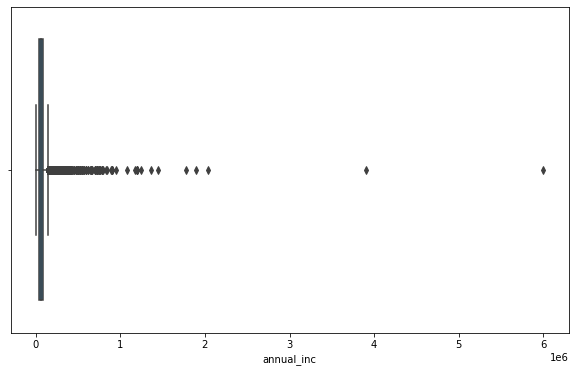

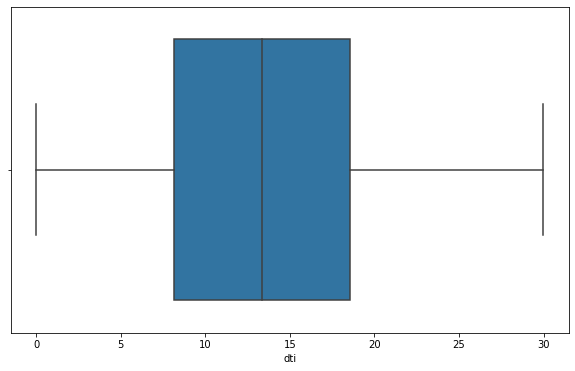

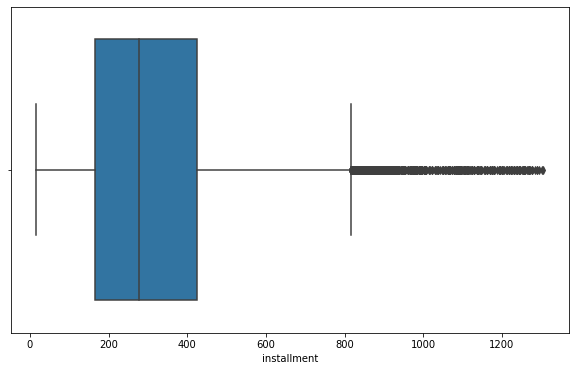

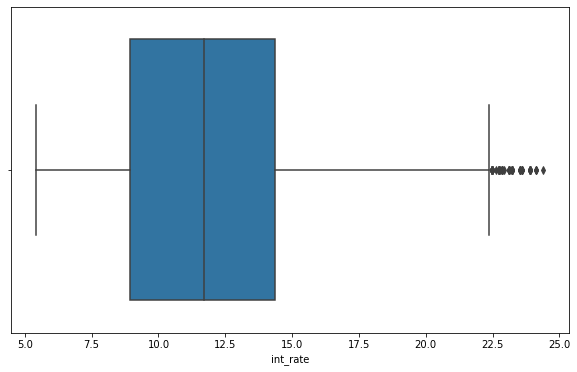

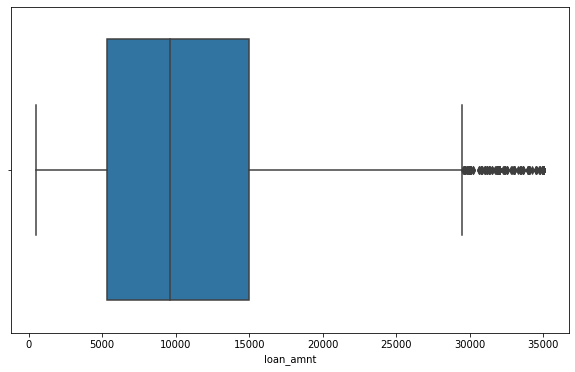

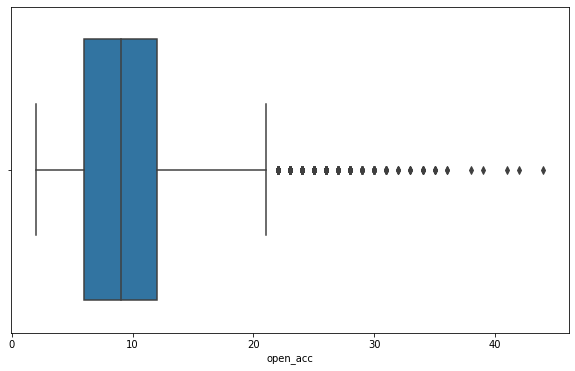

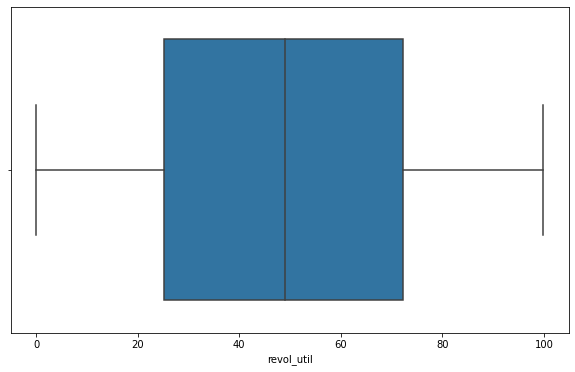

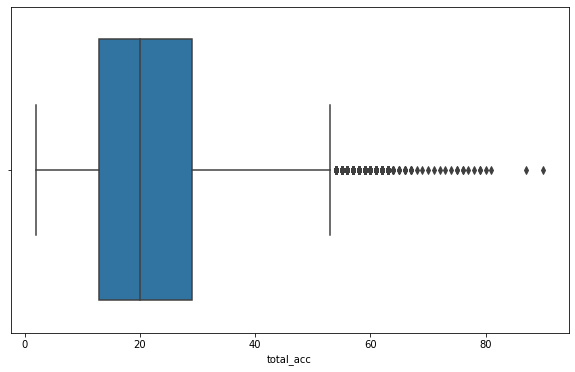

In [47]:
# Outliers Analysis for numerical columns
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(loan_df[col])
    plt.show()


In [48]:
# From the box plots, it seems like annual income has a lot of outliers which are not continuous. 
# Checking for more details about this column.
loan_df['annual_inc'].describe()

count    3.852700e+04
mean     6.880923e+04
std      6.421493e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [49]:
# Based on the info above, the mean and median are far-off from each other. Also max value is not in the same range. 
# So checking the values at the 95 percentile value and the IQR (Inter Quartile Range)
quantile_95 = loan_df['annual_inc'].quantile(0.95)

print(quantile_95)

Q1 = loan_df['annual_inc'].quantile(0.25)
Q3 = loan_df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
upper_thresh = Q3 + 1.5*IQR

print(upper_thresh)

140004.0
145000.0


In [50]:
# Considering that 95 percentile value and the upper threshold value are in the similar range, 
# we will be considering the 95 percentile value for outlier removal.
loan_df = loan_df[loan_df['annual_inc'] <= quantile_95]

loan_df['annual_inc'].describe()

count     36606.000000
mean      60890.563839
std       27741.337421
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      140004.000000
Name: annual_inc, dtype: float64

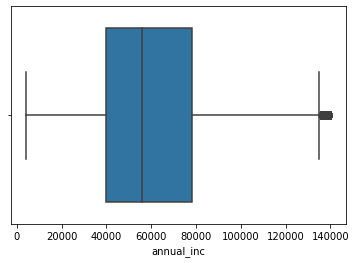

In [51]:
# Plotting the box plot for the annual income column to check the distribution after outlier removal.
sns.boxplot(loan_df['annual_inc'])
plt.show()

# Observation - 
# The distribution looks continuous and the mean and median are closer to each other.
# Majority of the annual_inc ranges from 40000 to 80000. 

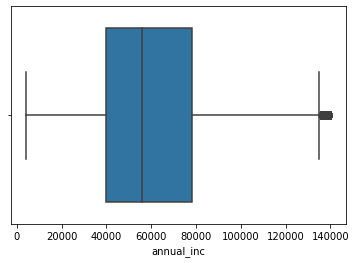

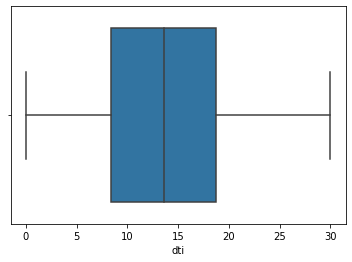

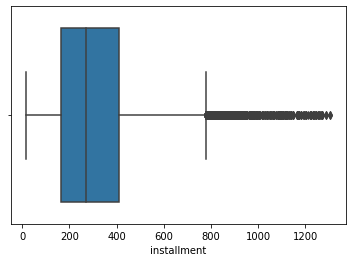

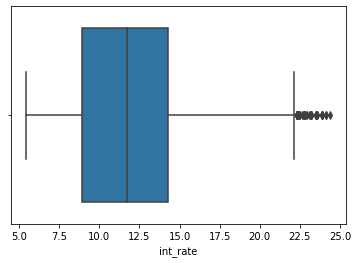

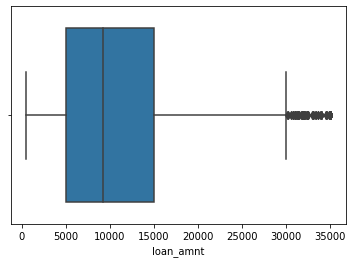

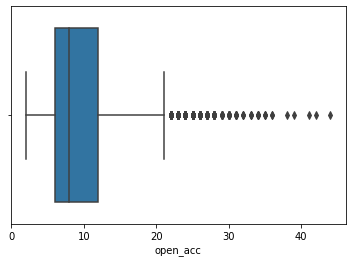

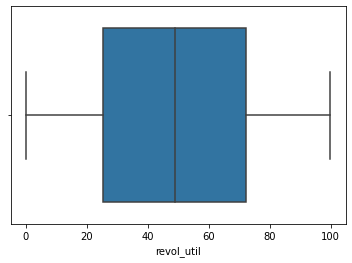

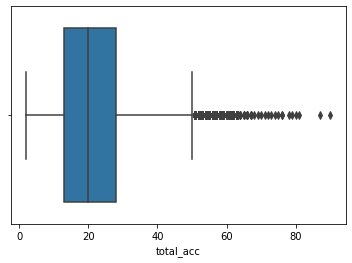

In [52]:
# Since we have removed some rows, replotting the box plots for the numerical columns.
for col in num_cols:
    sns.boxplot(loan_df[col])
    plt.show()
    
# Observations - 
# 1. Annual incomes are right-skewed, with most borrowers earning below 75,000, with median 55000 approx.
# 2. Most loans have interest rates between 7.5% and 15%, with a peak around 12.0%.
# 3. The loan amounts vary widely, with a concentration around 5000 to 15,000, with maximum loan disbursed for 8000 approx.
# 4. Most borrowers have a DTI below 18% with median at 13%.

In [53]:
# Checking the values for loan_status
print(round(100*loan_df['loan_status'].value_counts()/len(loan_df)))

# Observation - 85% of the loans are paid while 15% are defaulters

Fully Paid     85.0
Charged Off    15.0
Name: loan_status, dtype: float64


In [54]:
# Dividing the dataframe into Defaulters and Fully paid customers
loan_defaulters_df = loan_df[loan_df['loan_status'] == 'Charged Off']
loan_fully_paid_df = loan_df[loan_df['loan_status'] == 'Fully Paid']

## Univariate Analysis

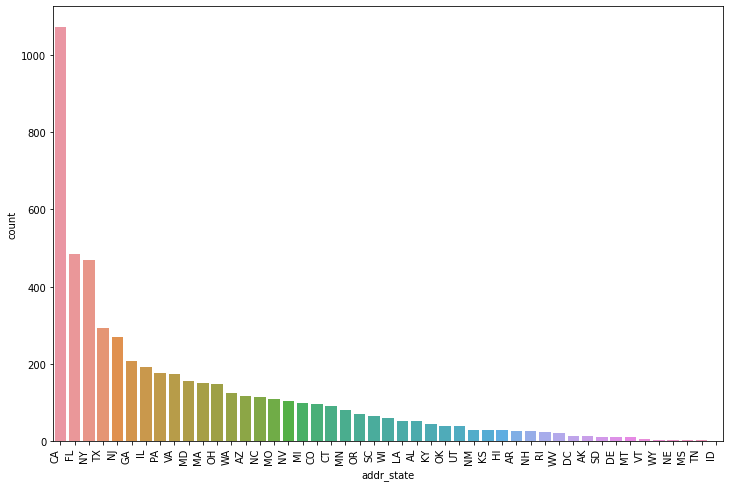

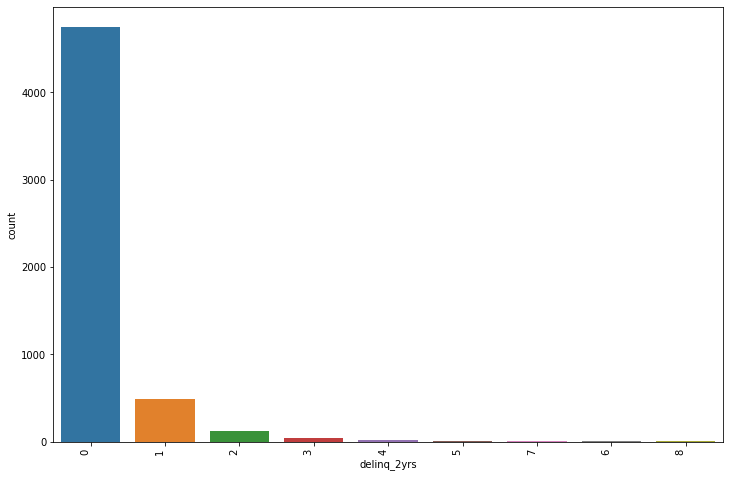

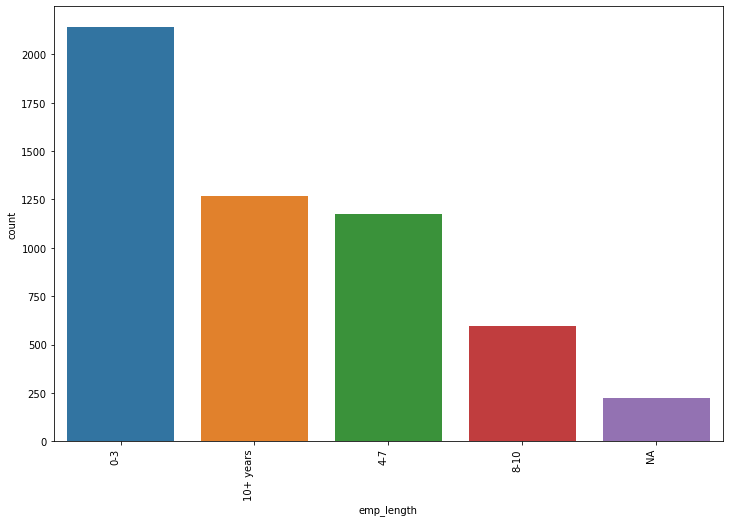

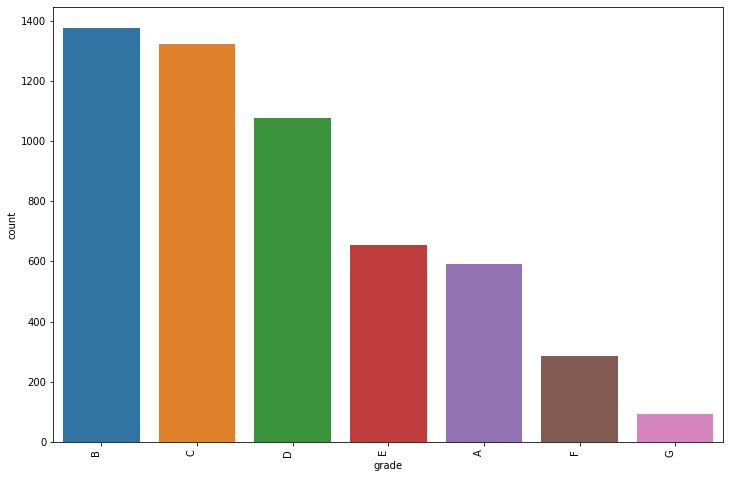

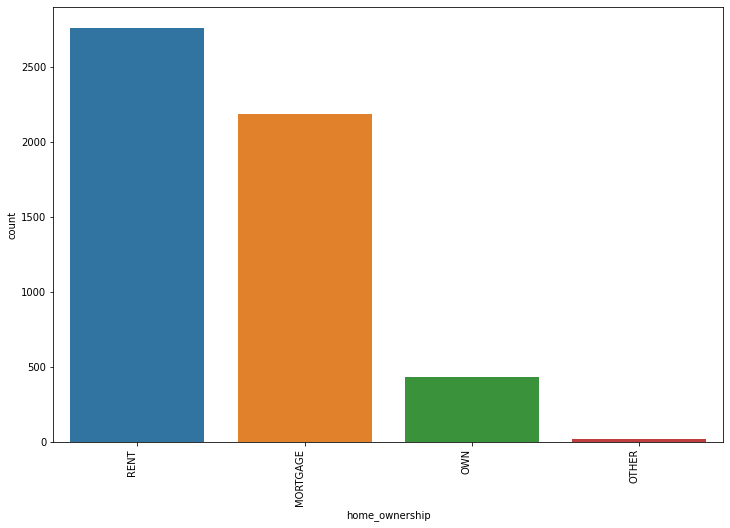

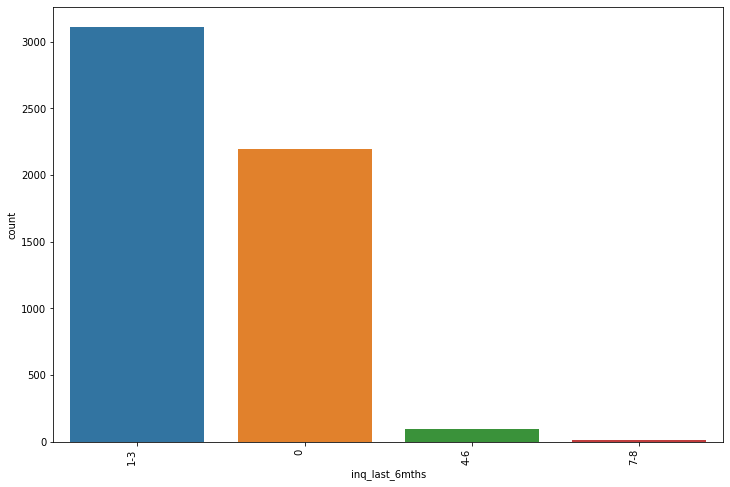

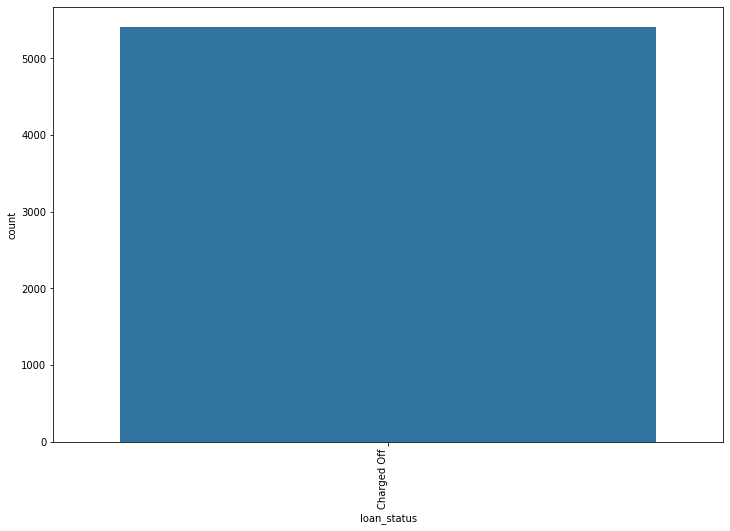

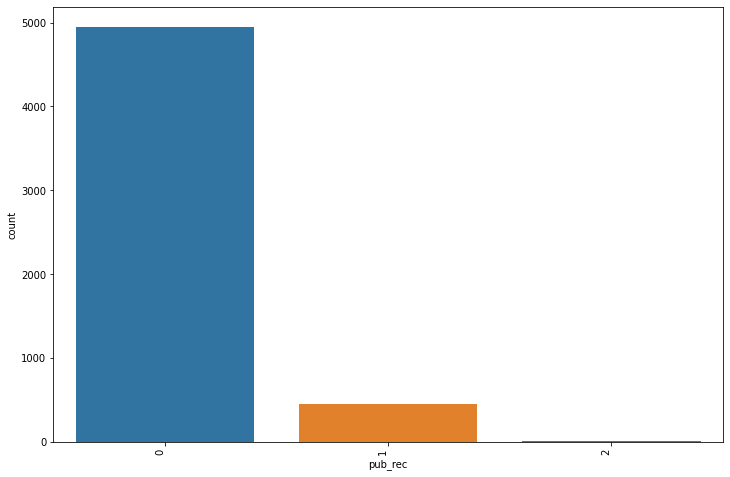

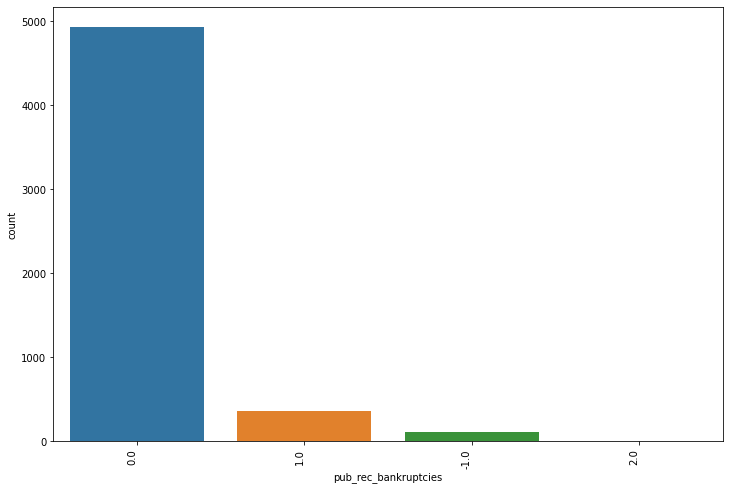

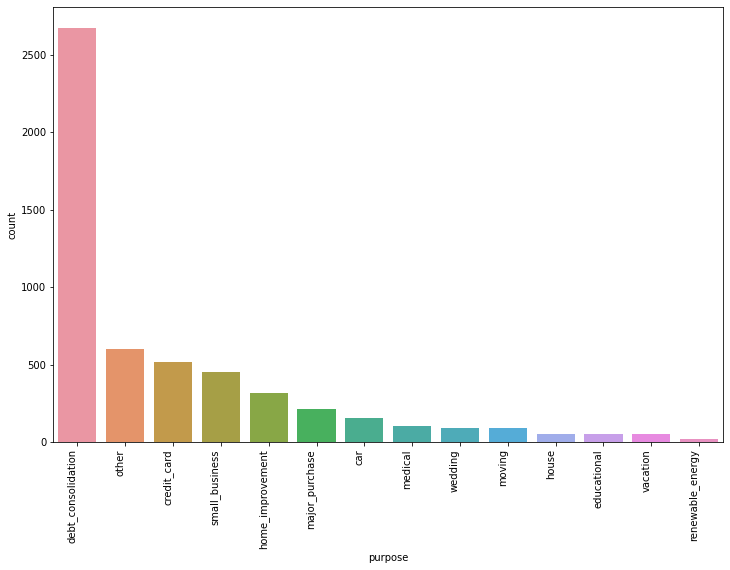

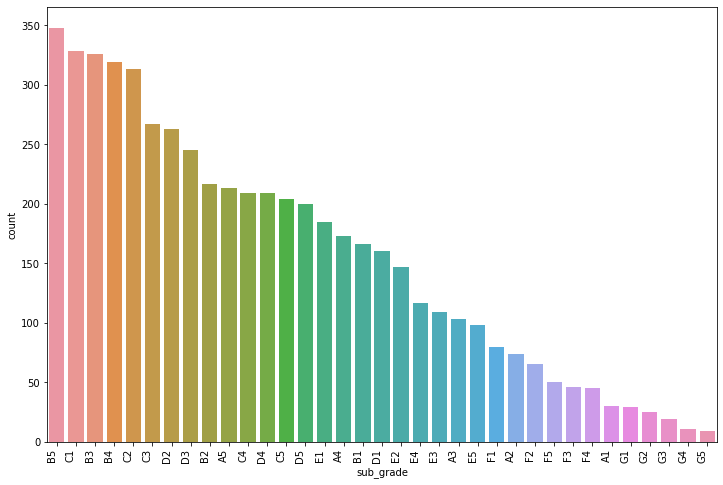

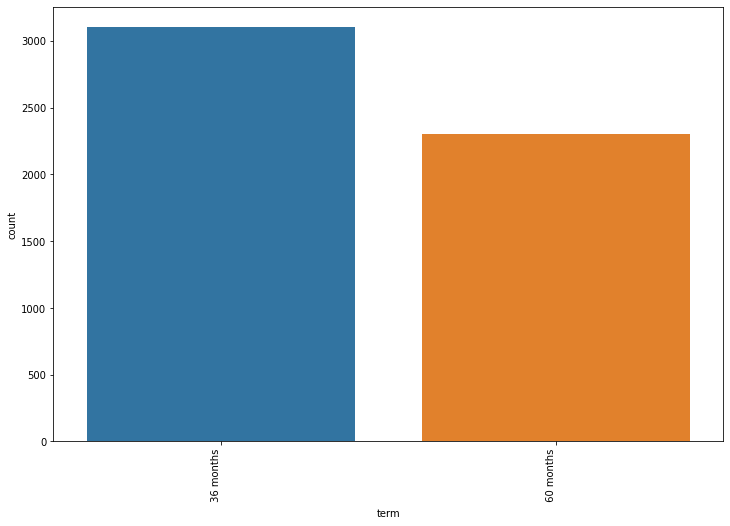

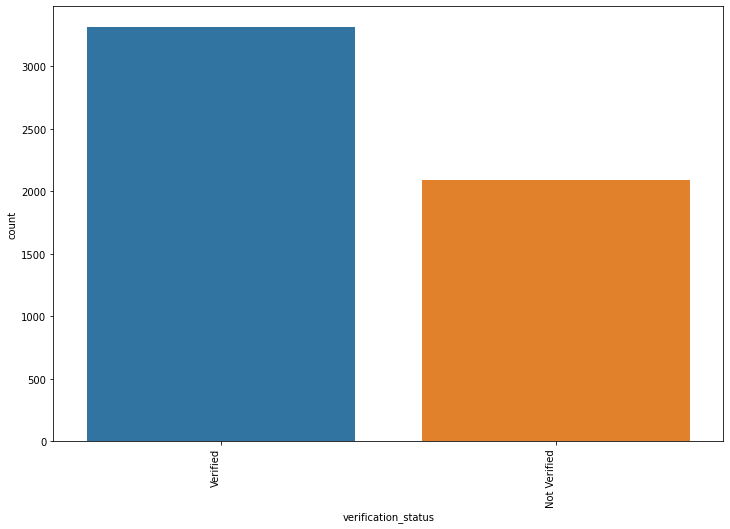

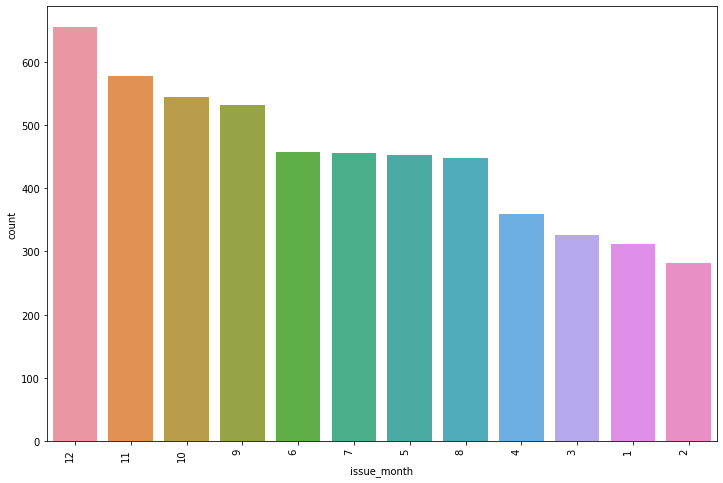

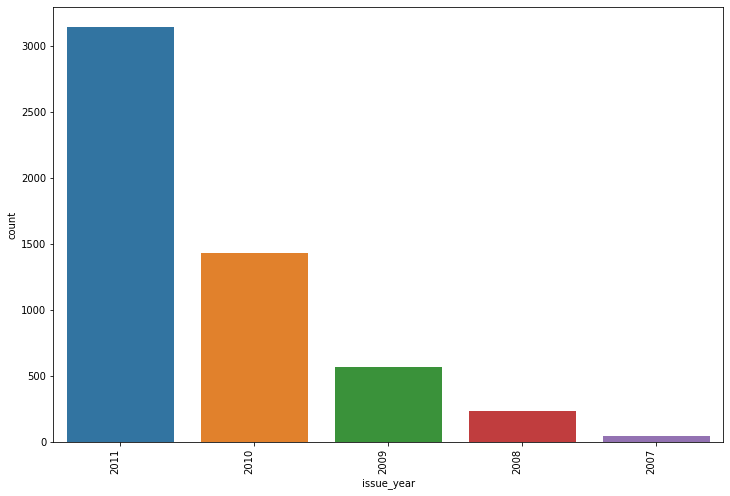

In [55]:
# Univariate Analysis for all defaulters

# Categorical

for col in cat_cols:
    axis_order = loan_defaulters_df[col].value_counts().index
    plt.figure(figsize=(12, 8))
    sns.countplot(loan_defaulters_df[col], order = axis_order)
    plt.xticks(rotation=90, ha='right')
    plt.show()
    
# Observations - 
# 1. CA has the highest no. of defaulters, followed by FL and NY.
# 2. Highest no. of defaulters are with experience 0-3 years.
# 3. Loan Grades B has the highest defaulters followed by C and D.
# 4. Majority of the defaulters don't own a house and live in a rented house.
# 5. Majority of the defaulters have 1-3 inquiries in the last 6 months.
# 6. Most defaulters purpose of taking the loan has been debt consolidation.
# 7. No. of loan defaulters are higher for loans issued towards the end of any year.
# 8. No. of loan defaults have increased over the year.
# 9. Most of the defaulters are ones with 36 months' loan term.

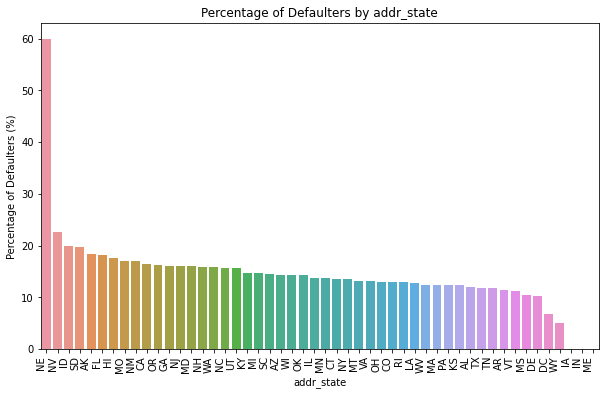

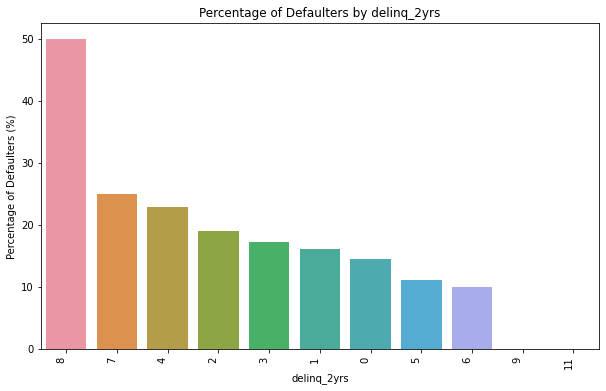

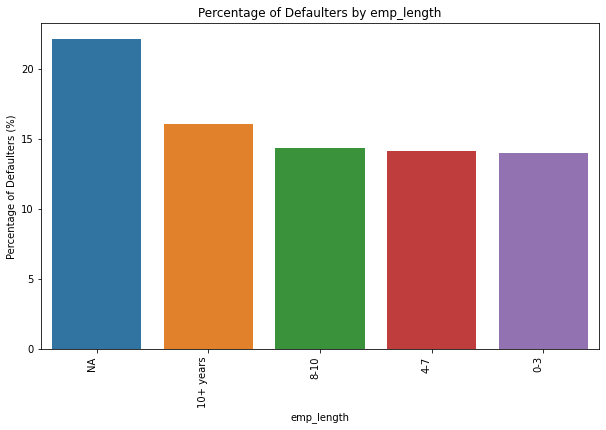

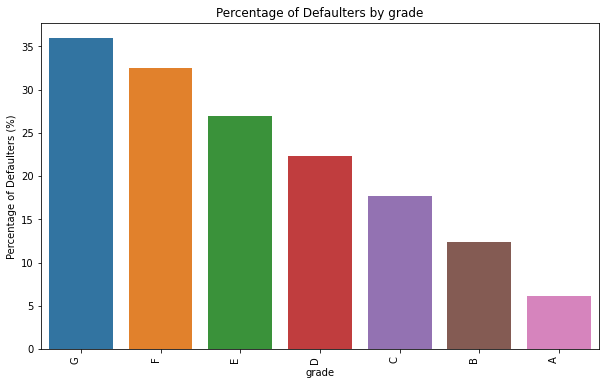

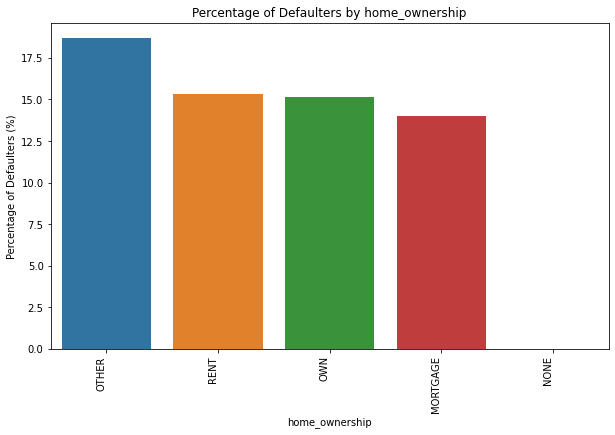

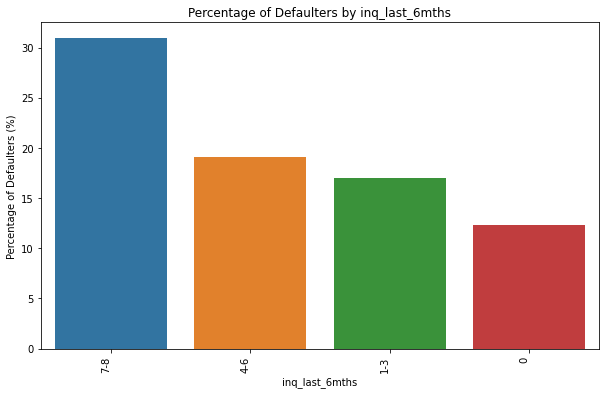

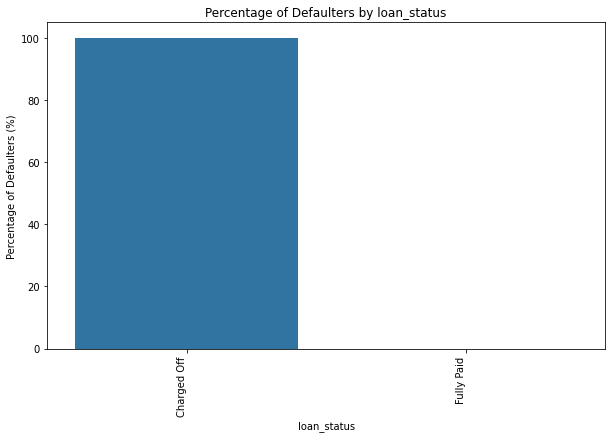

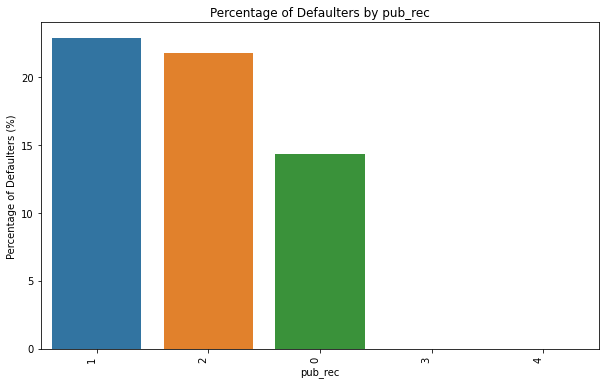

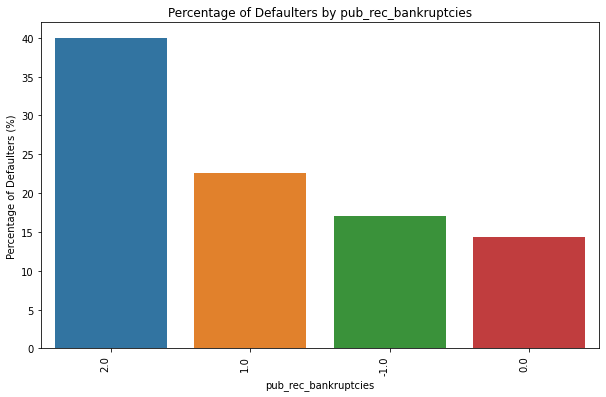

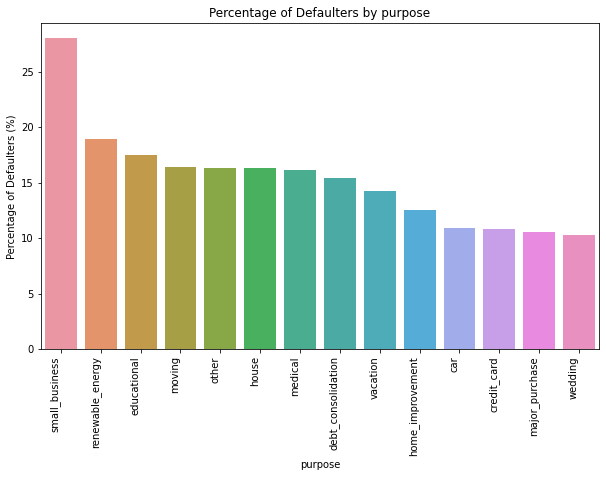

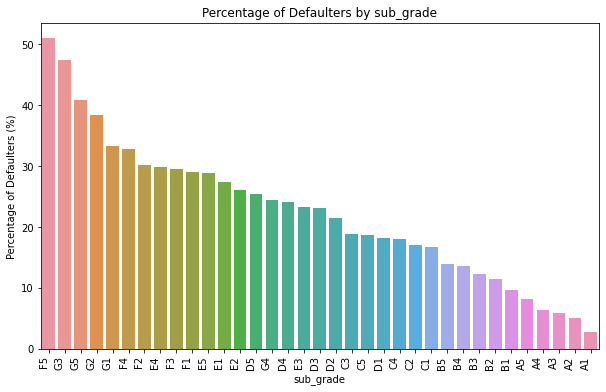

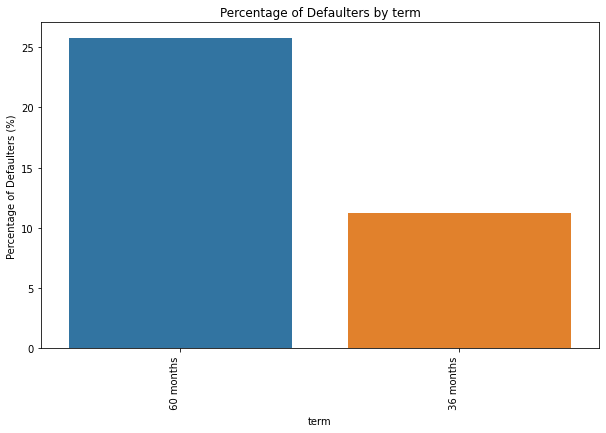

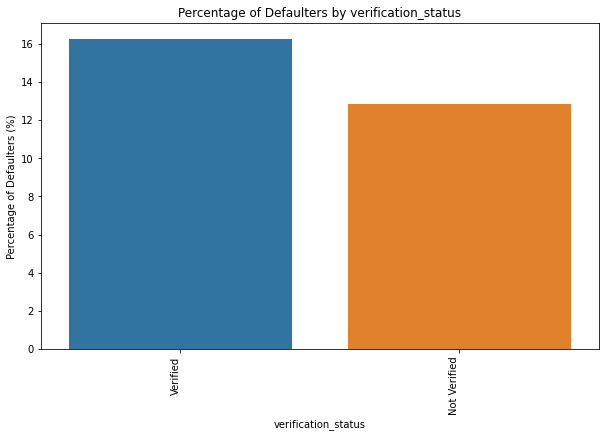

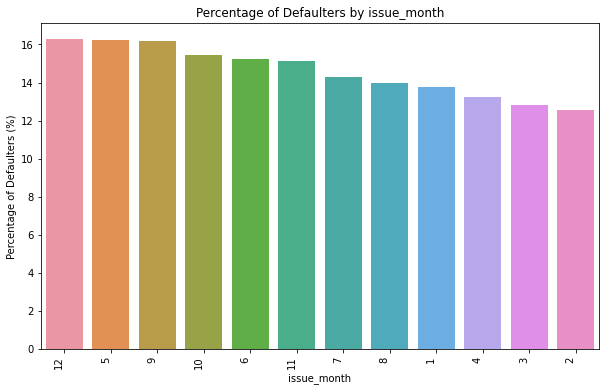

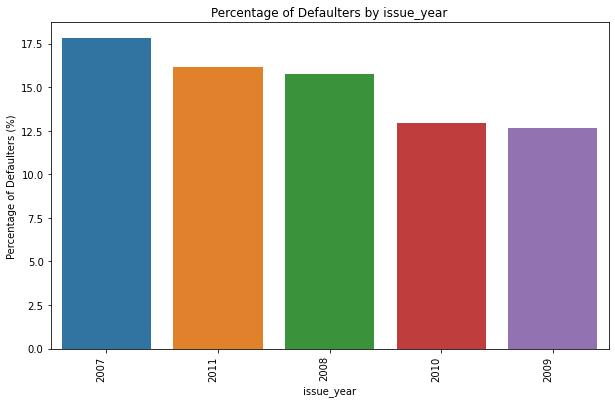

In [56]:
# Univariate Analysis to see the percentage of defaulters over total no. of loan applicants

def plot_percentage_defaulters(df, col):
    # Calculate total and defaulter counts
    total_counts = df[col].value_counts()
    default_counts = df[df['loan_status'] == 'Charged Off'][col].value_counts()

    # Calculate percentages
    percentages = (default_counts / total_counts) * 100
    percentages = percentages.reset_index()
    percentages.columns = [col, 'percentage']

    # Sort the DataFrame by percentage values in descending order
    percentages = percentages.sort_values(by='percentage', ascending=False)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='percentage', data=percentages, order=percentages[col])
    plt.xticks(rotation=90, ha='right')
    plt.title(f'Percentage of Defaulters by {col}')
    plt.ylabel('Percentage of Defaulters (%)')
    plt.xlabel(col)
    plt.show()

# Plot for each categorical column
for col in cat_cols:
    plot_percentage_defaulters(loan_df, col)
    
# Observations - 
# 1. Percentage of loan defaults is highest (~60%) in NE. Average percentage ranges between 10% - 20%. CA has 17% defaulting, 
#    while FL has 19% and NY has ~14% defaulting.
# 2. Loan applicants who have 8 instances of 30+ days past due on a payment in the past two years have highest percentage of 
#    loan defaults.
# 3. Percentage of defaulters seem to be increasing with decrease in loan grade quality. 
#    For example, Loan grades A & B with highest credit quality have low percentage of defaults between 6% - 12%.
#    At the same time Loan grade G with lowest credit quality has highest percentage of defaults (~35%).
# 4. Percentage of defaulters is highest (~30%) for people who have 8 counts of loan inquiries in the last 6 months.
# 5. People with derogatory public records have higher percentage of loan defaulters than people with no derogatory public 
#    records.
# 6. Same goes for loan applicants with existing public record bankruptcies. They have higher chance of defaulting.
# 7. Percentage of loan defaulters increase to ~28% from the average of 10% - 15% for applicants who need the loan to finance 
#    their small business.
# 8. Similar to the grades, the probability of defaulting a loan increases with decreasing sub-grade (A1 to G5) with F5 
#    having the highest percentage of loan defaulters (~50%).
# 9. Percentage of defaulters doubles (~25%) for 60 months' term as compared to 36 months' term (~ 12%). 
# 10. We have seen a decreasing trend of percentage of loan defaulters from 2007 - 2010 with 2011 showing a considerable 
#     increase in the percentage of loan defaulters.


## Bivariate Analysis

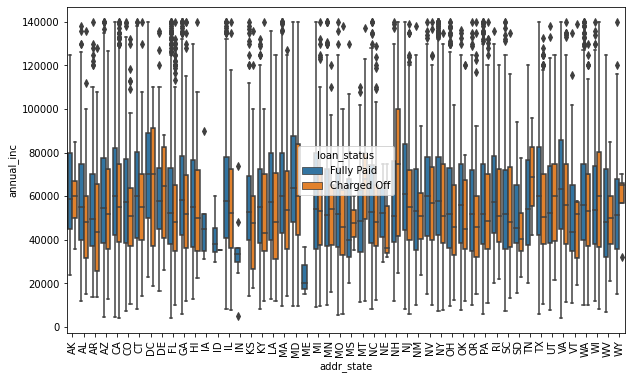

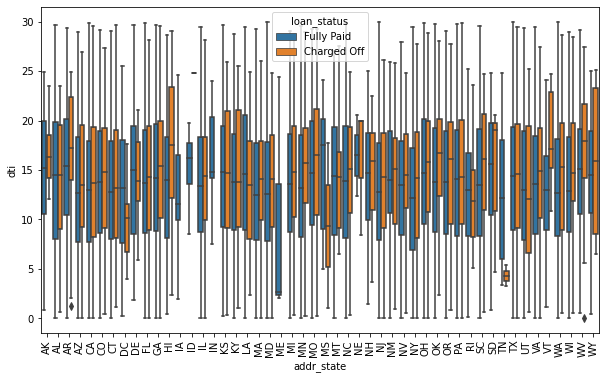

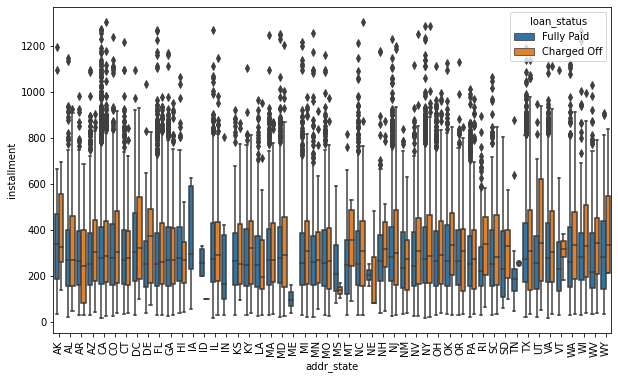

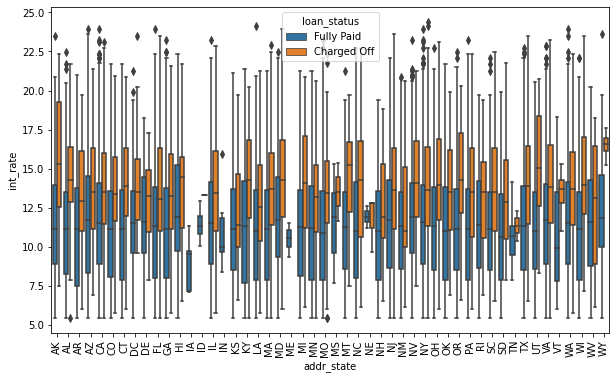

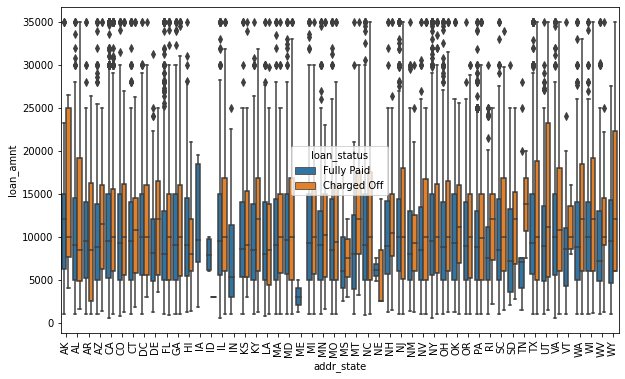

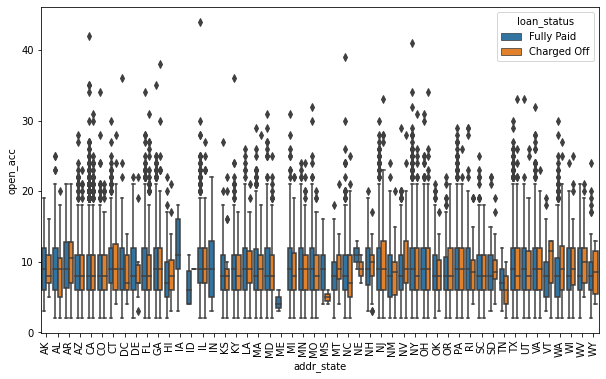

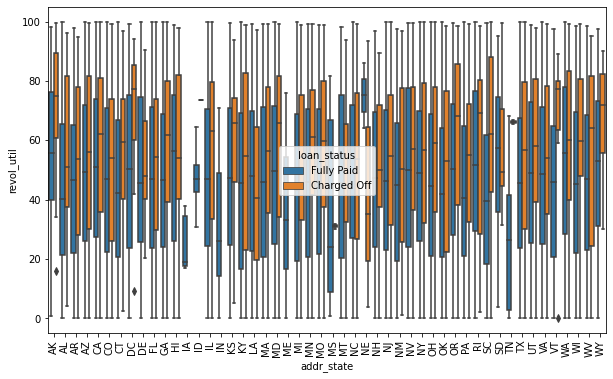

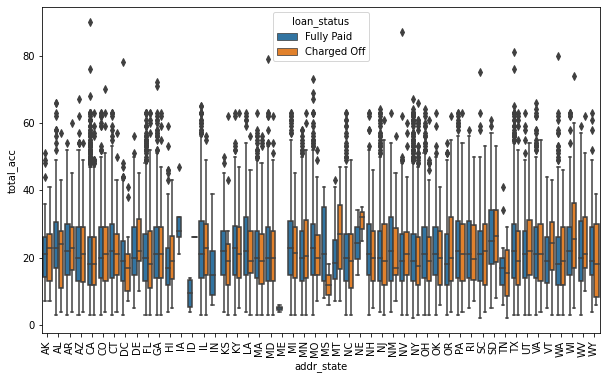

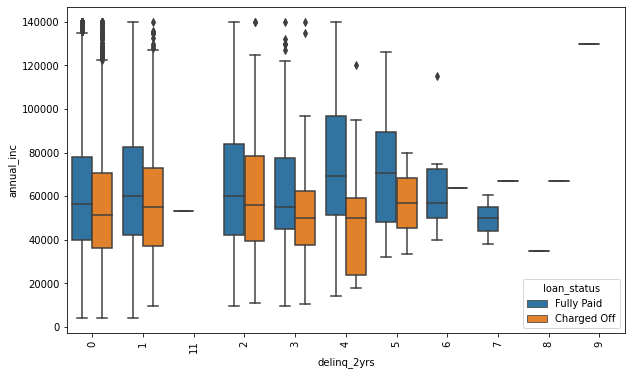

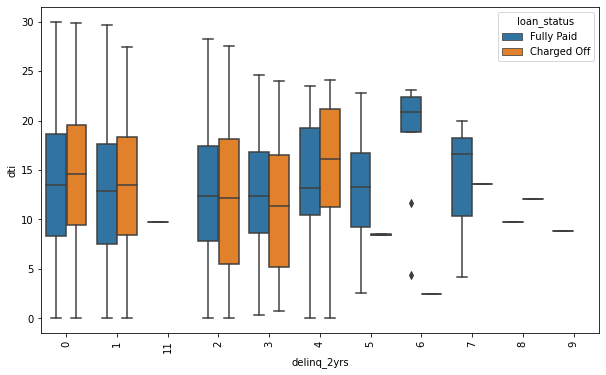

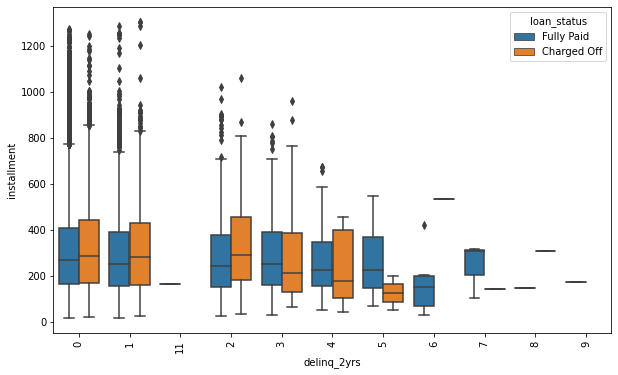

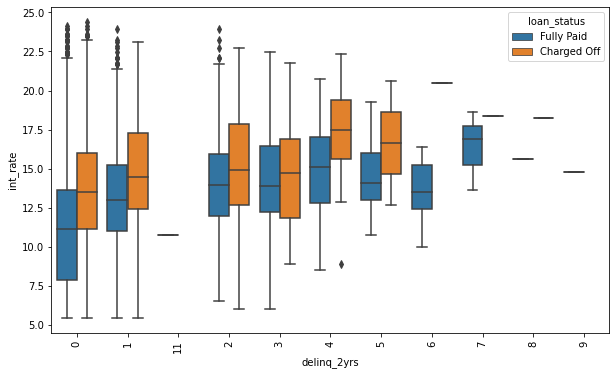

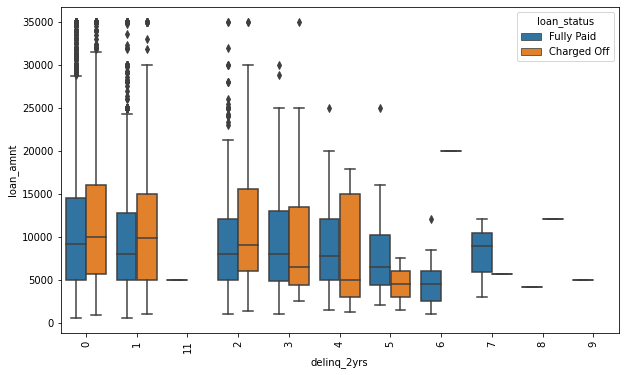

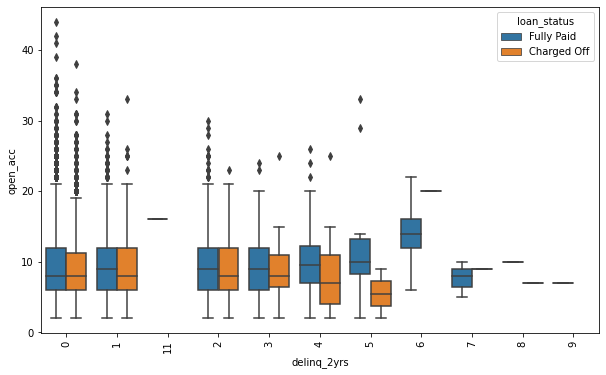

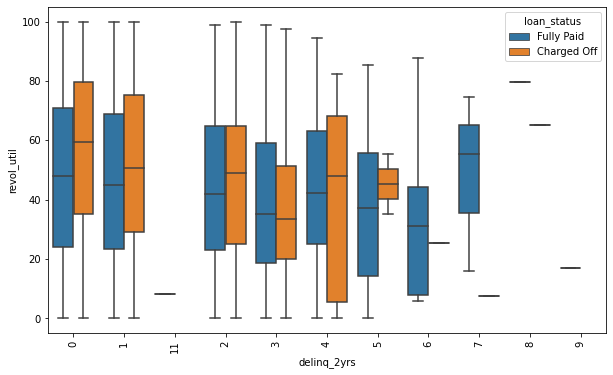

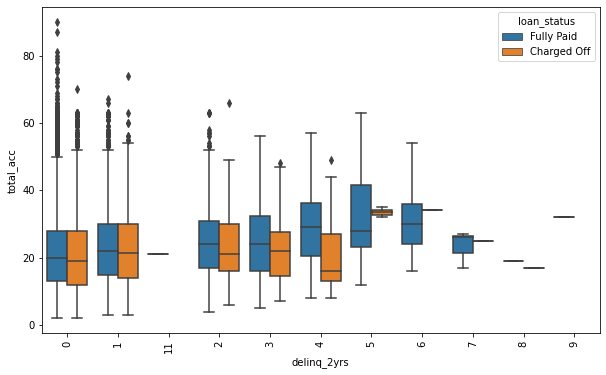

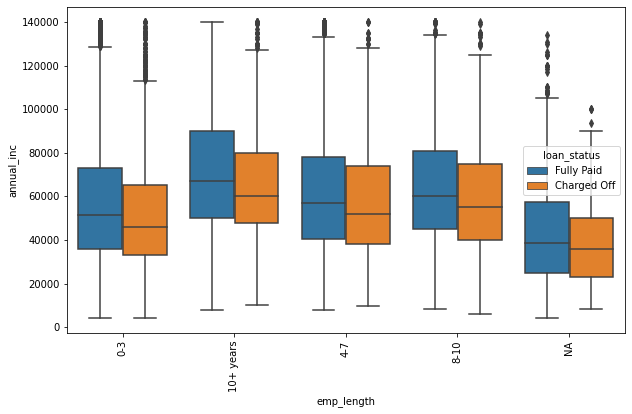

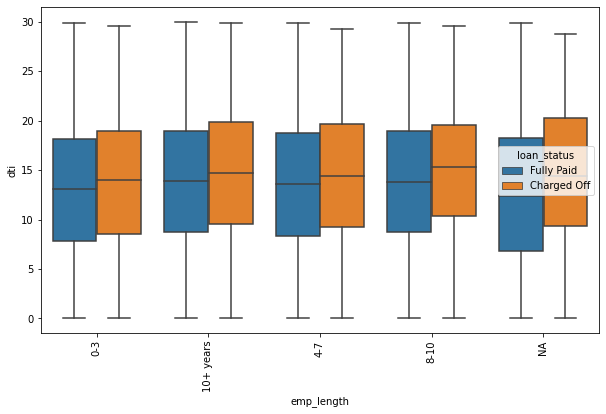

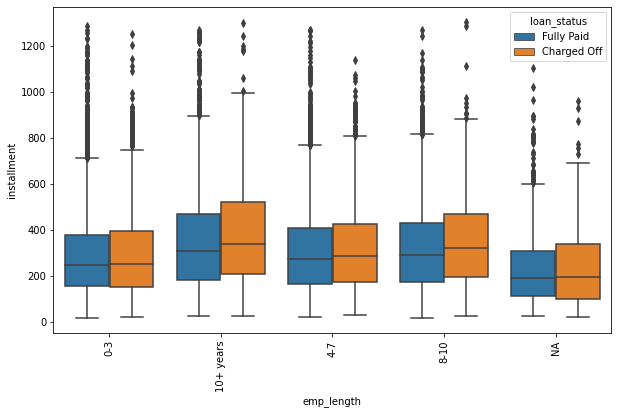

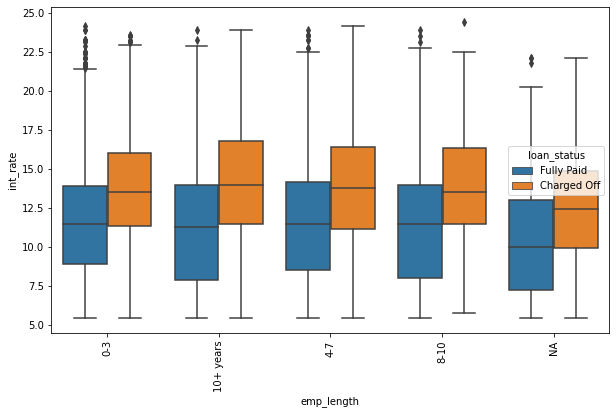

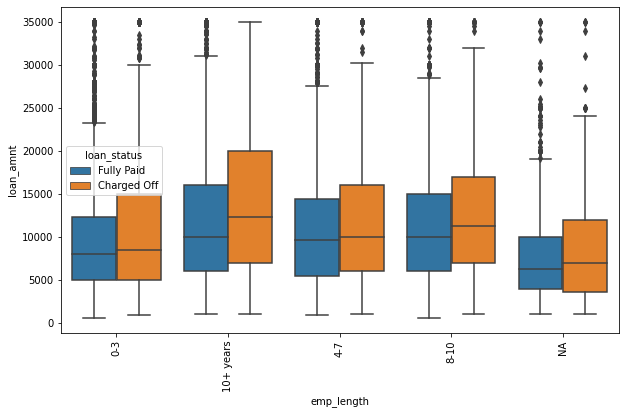

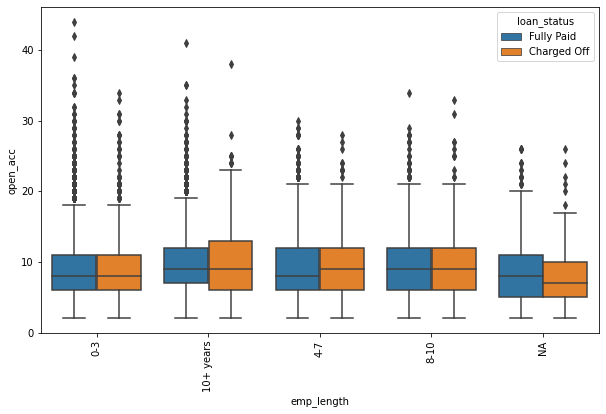

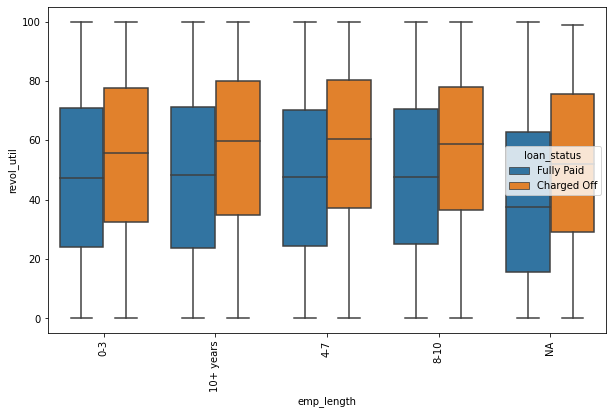

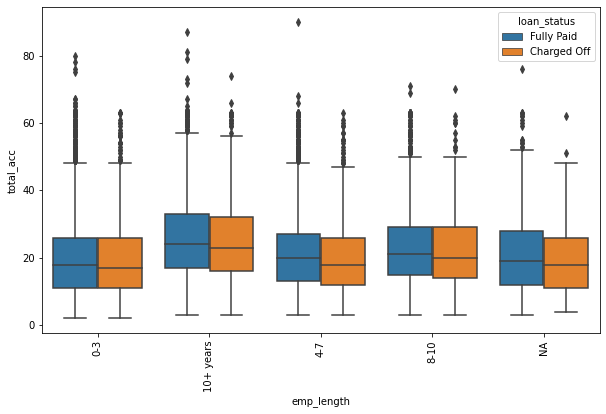

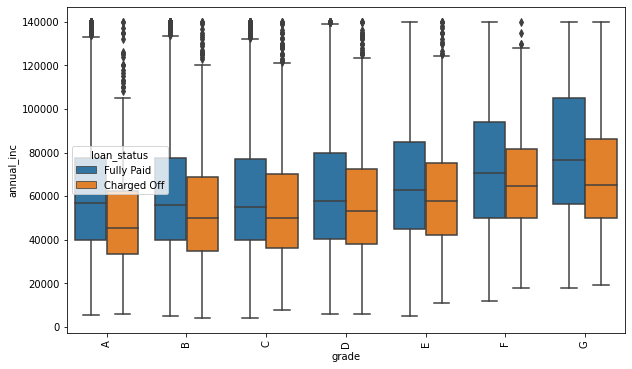

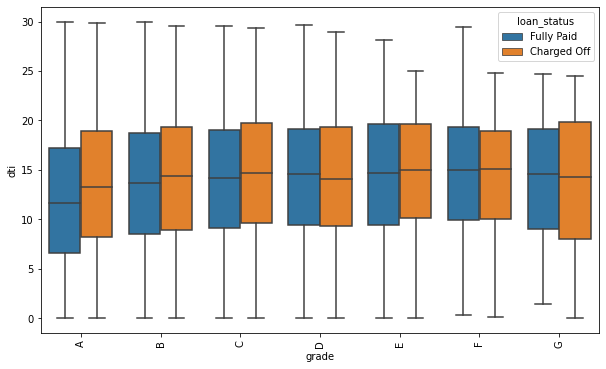

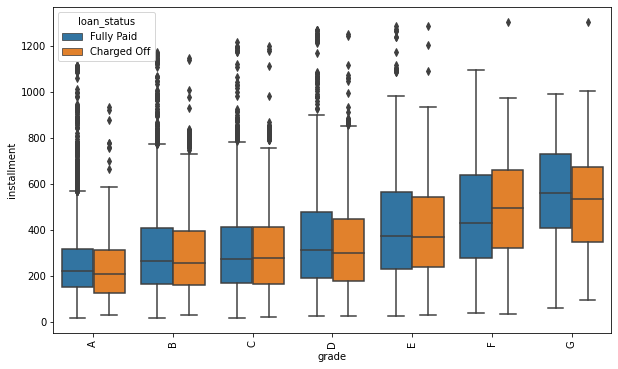

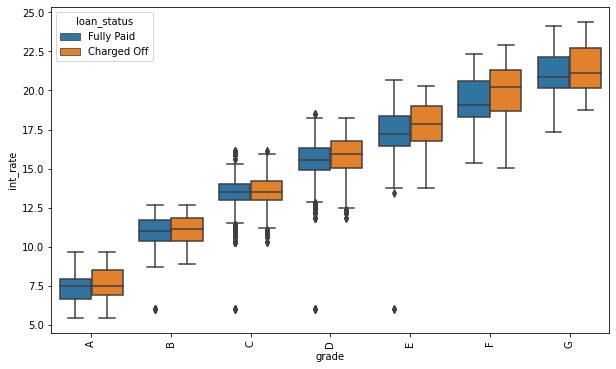

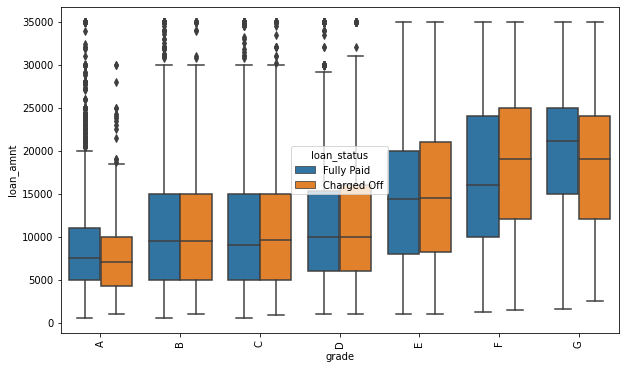

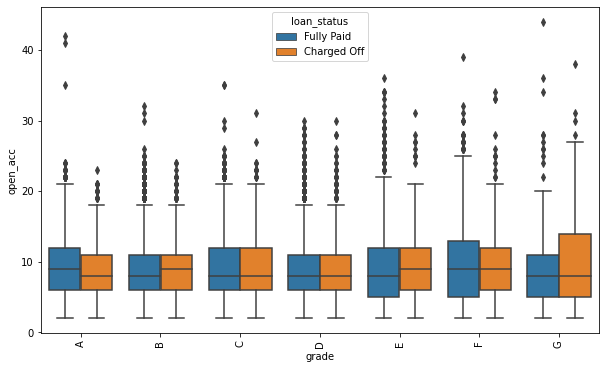

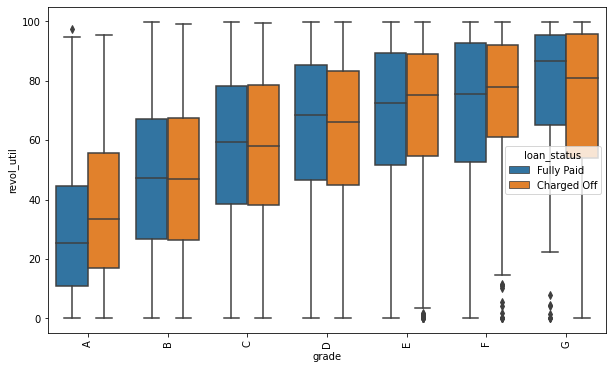

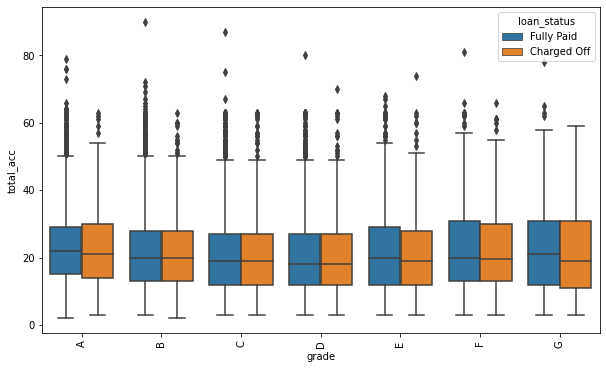

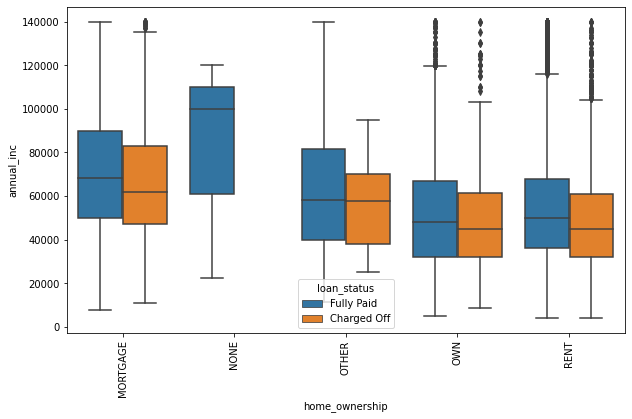

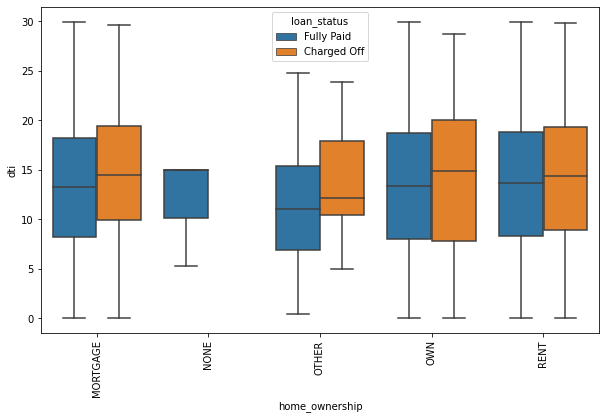

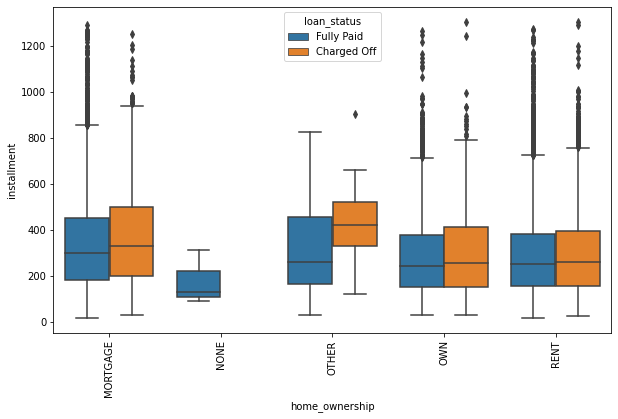

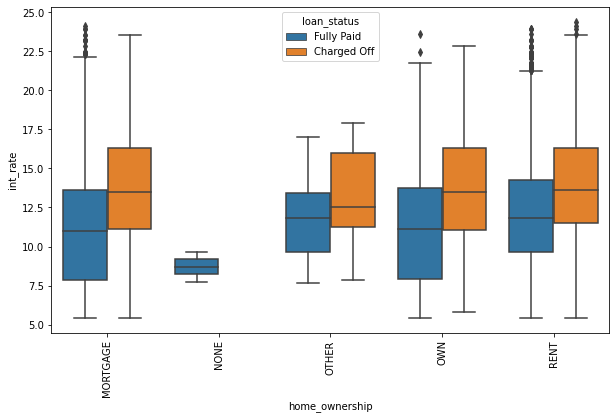

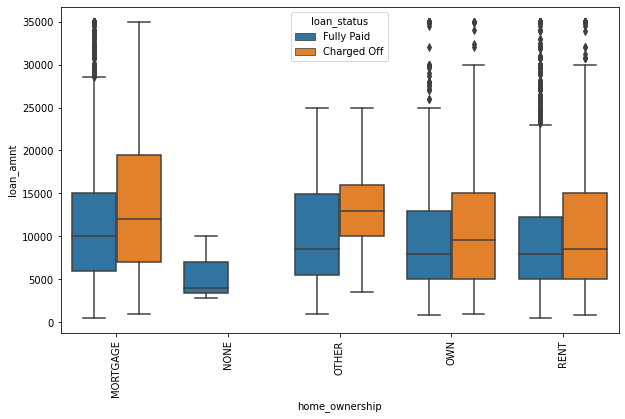

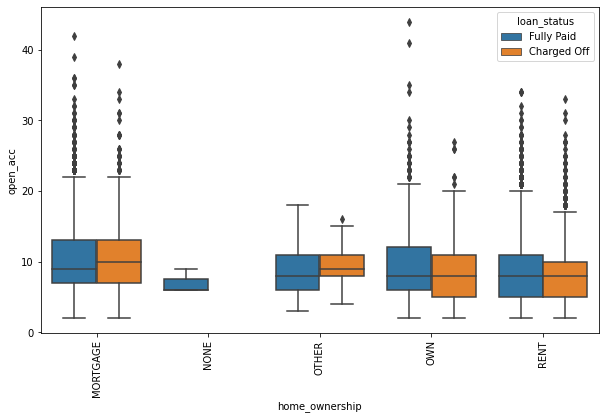

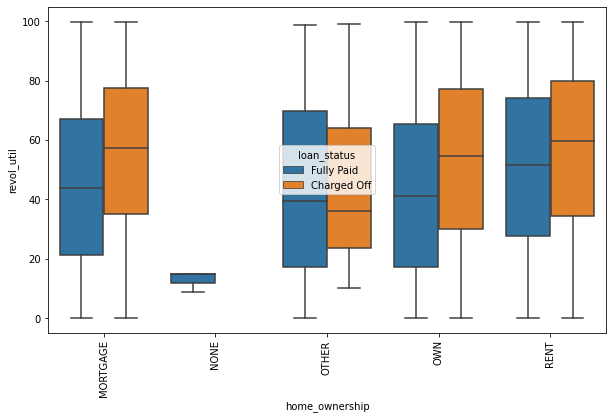

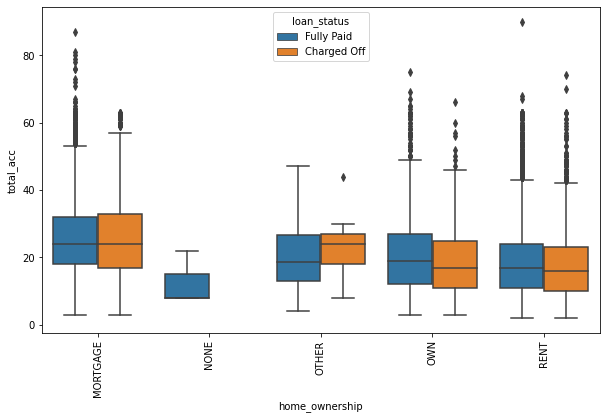

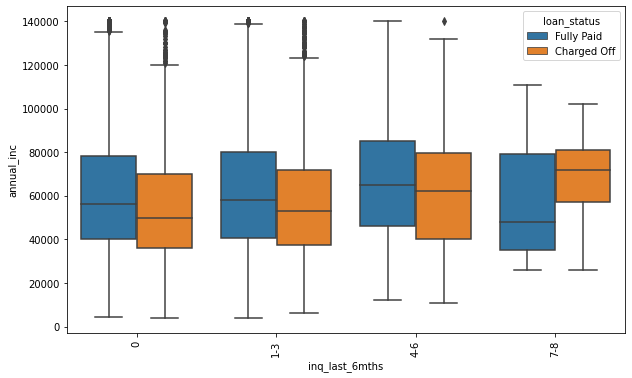

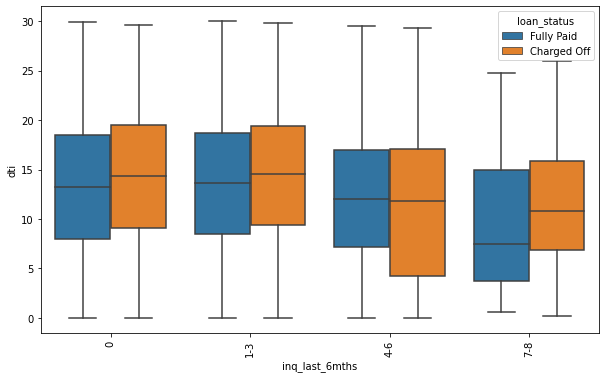

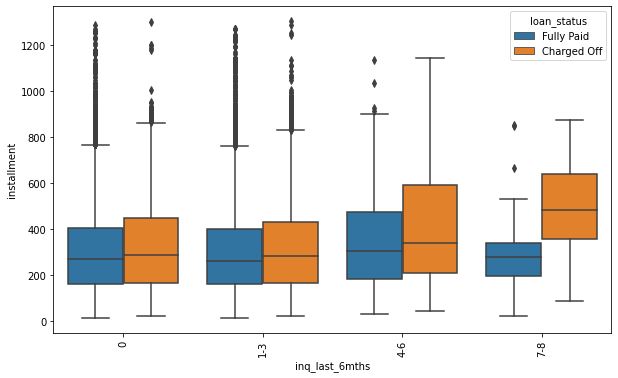

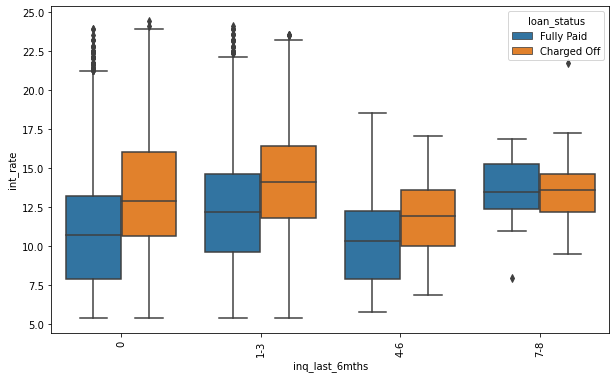

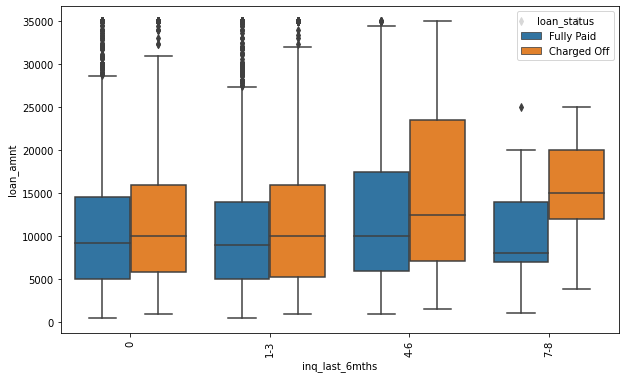

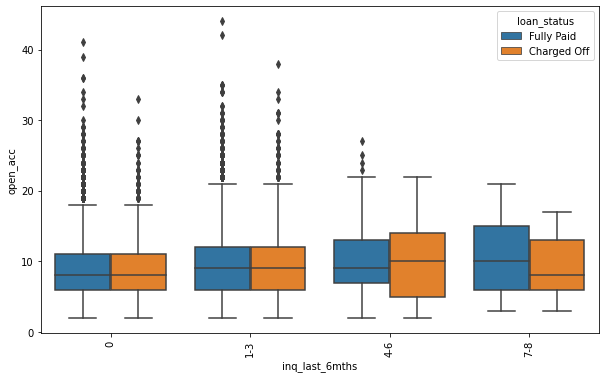

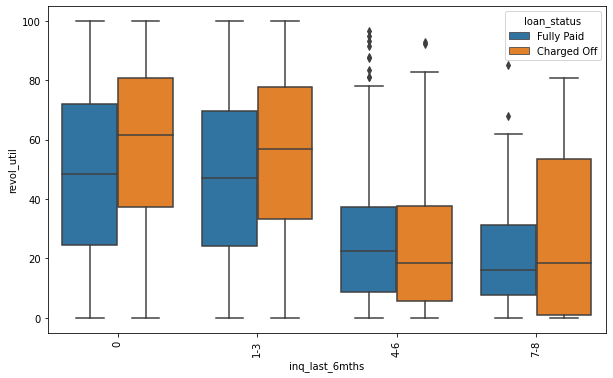

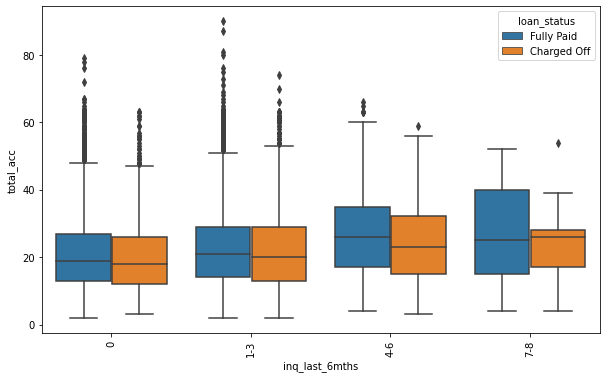

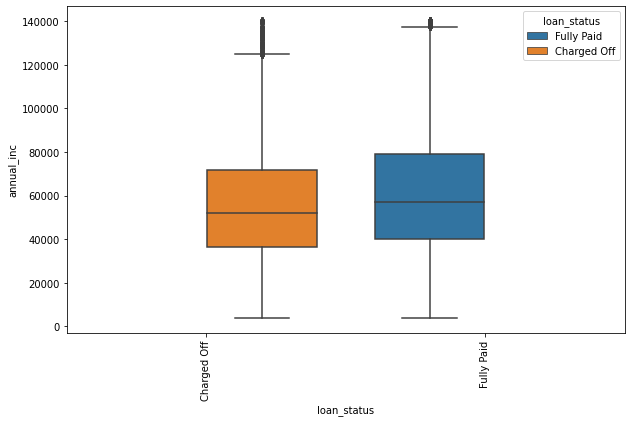

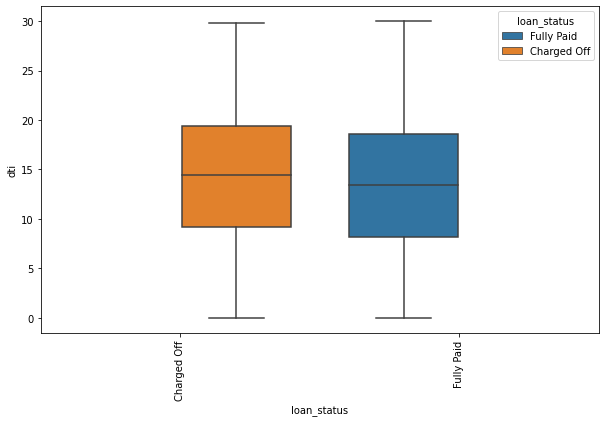

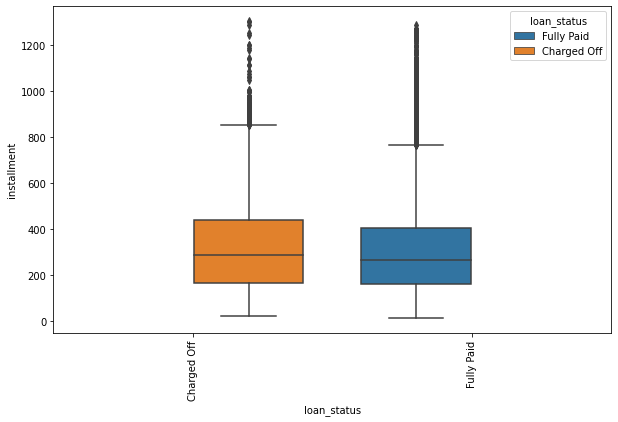

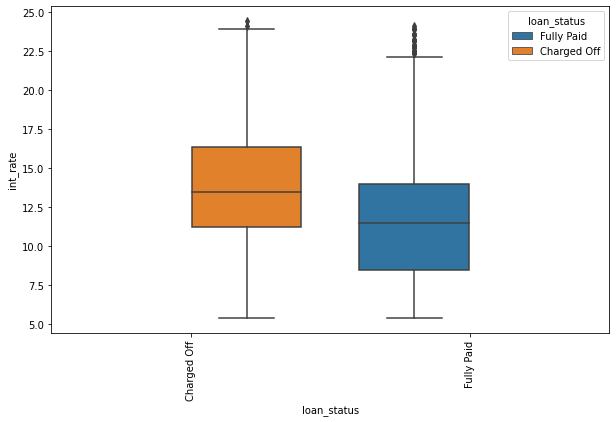

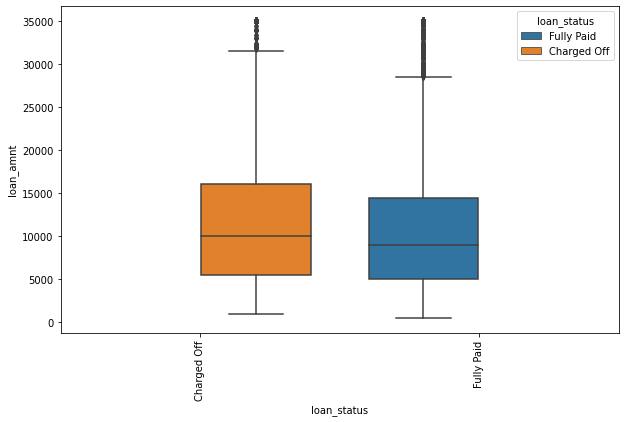

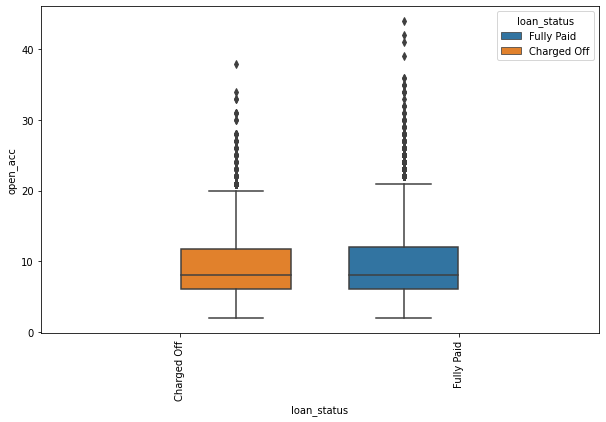

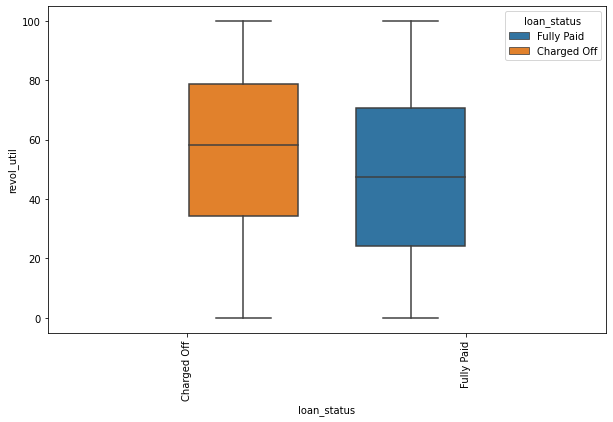

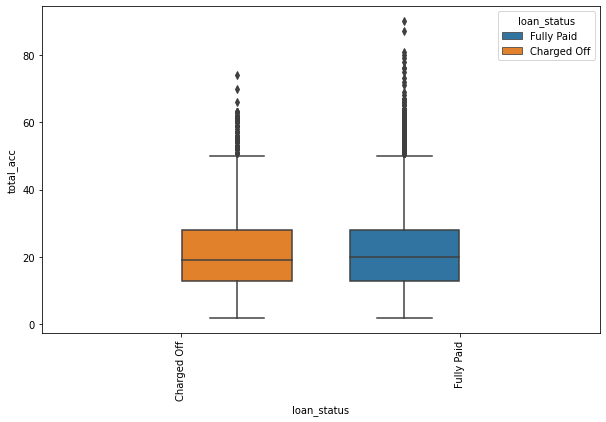

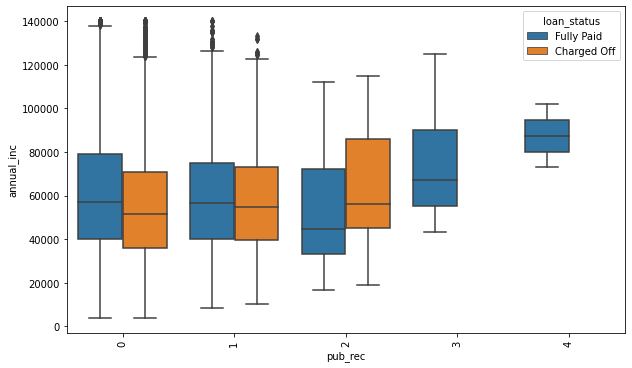

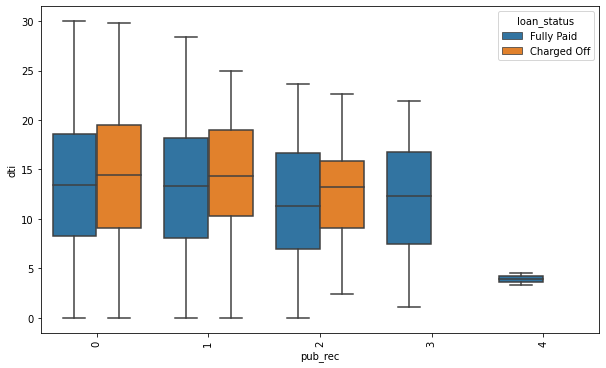

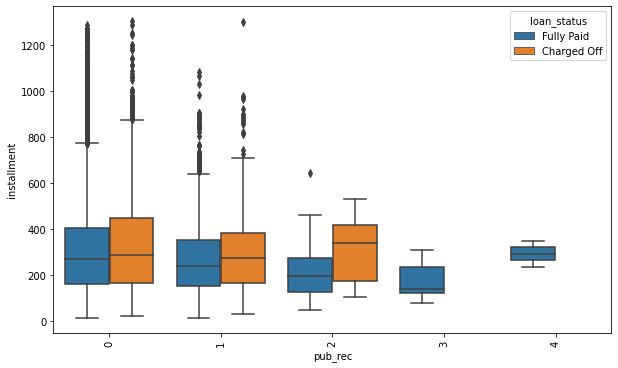

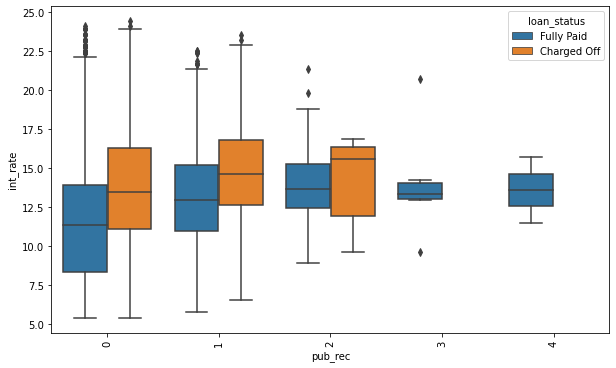

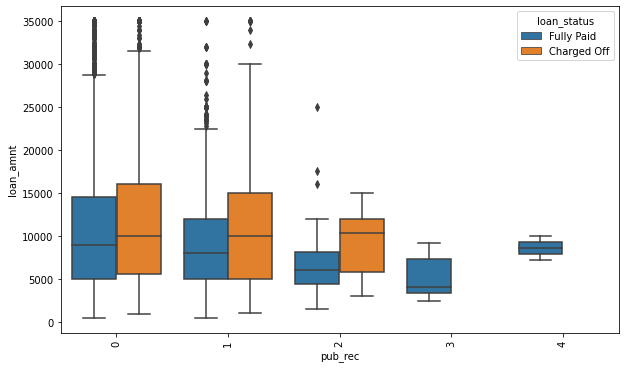

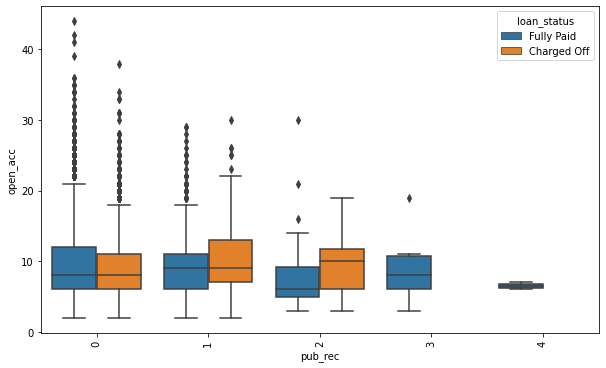

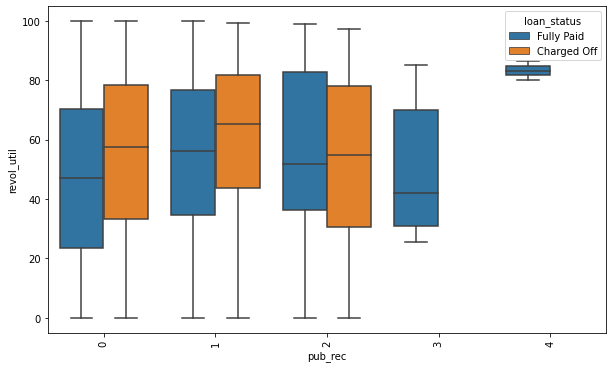

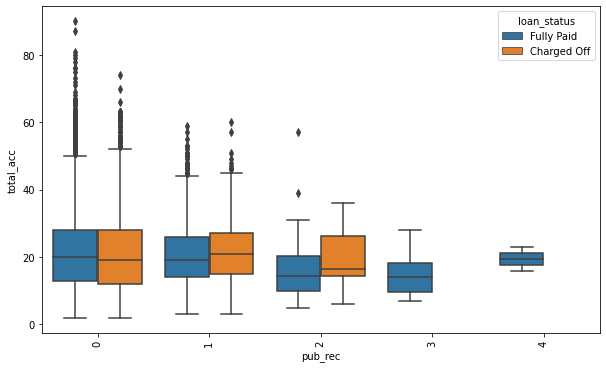

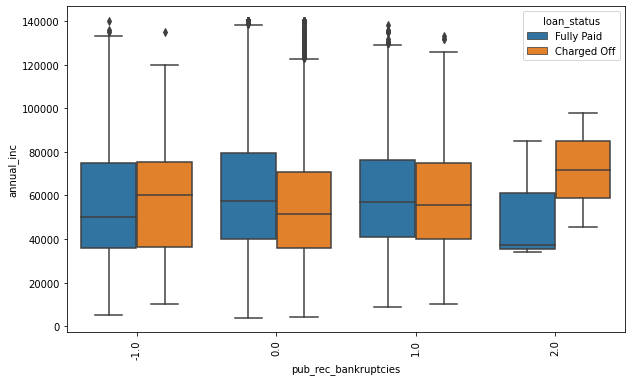

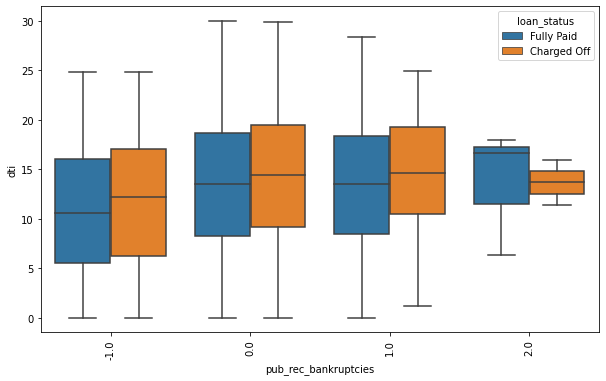

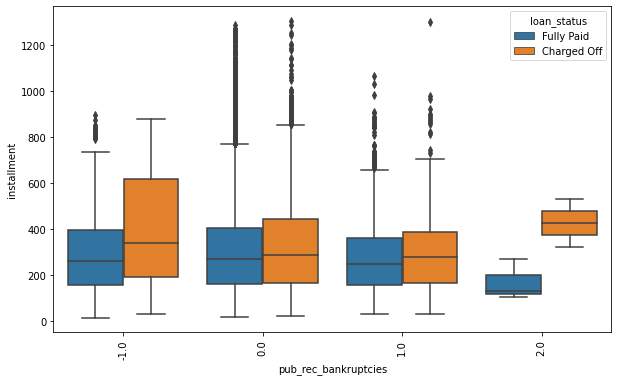

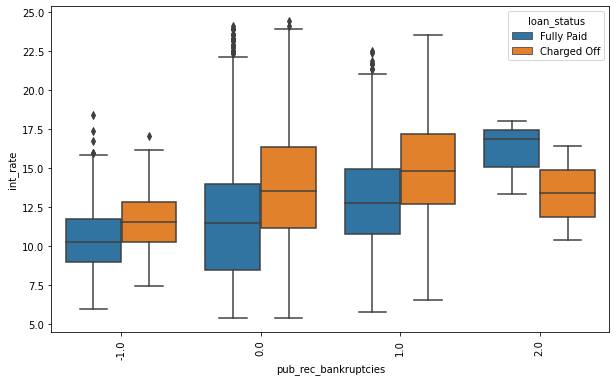

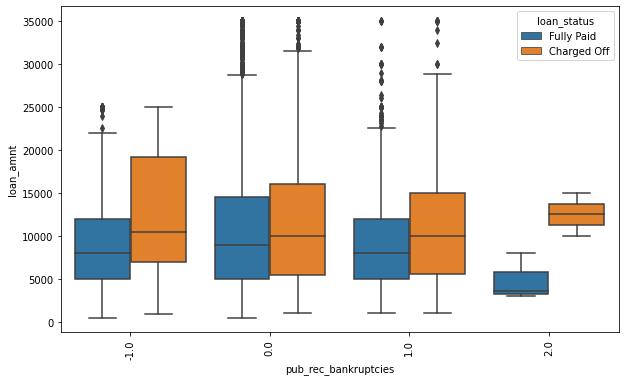

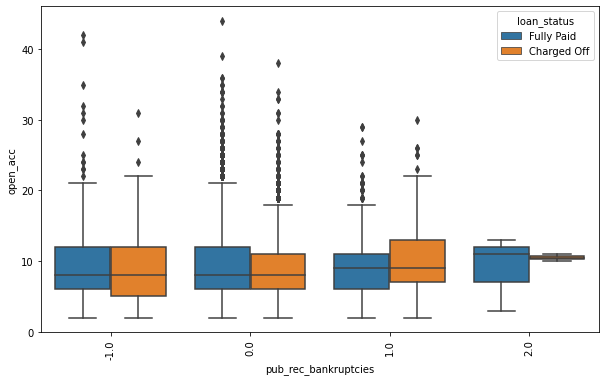

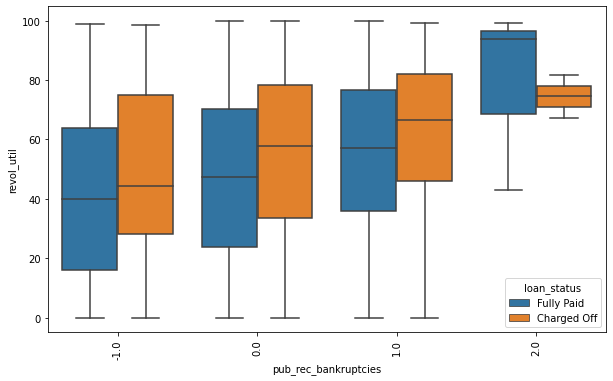

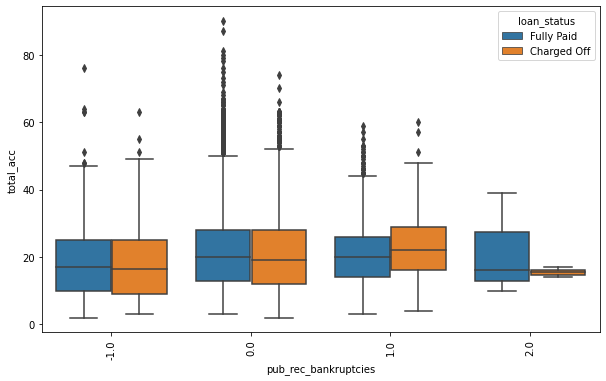

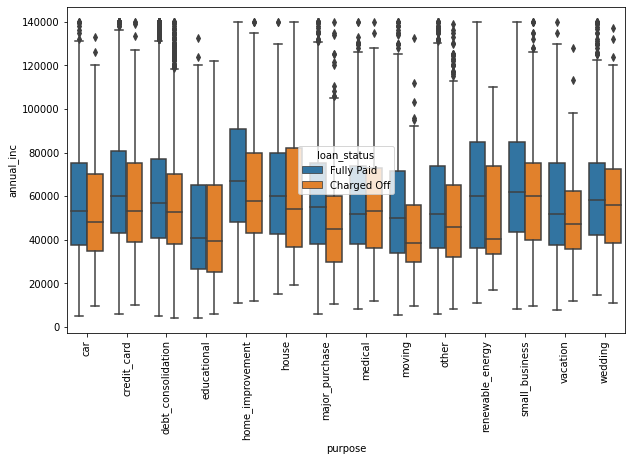

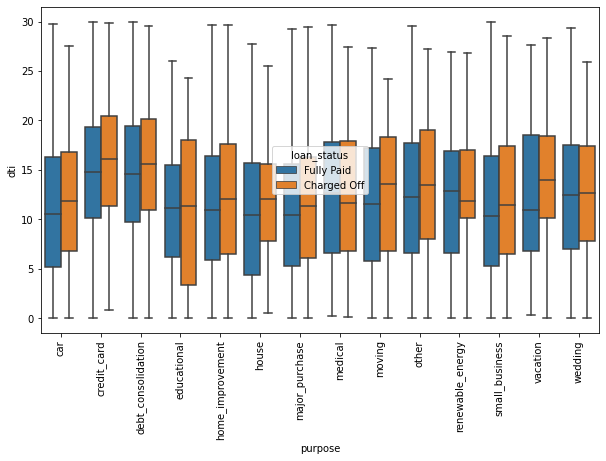

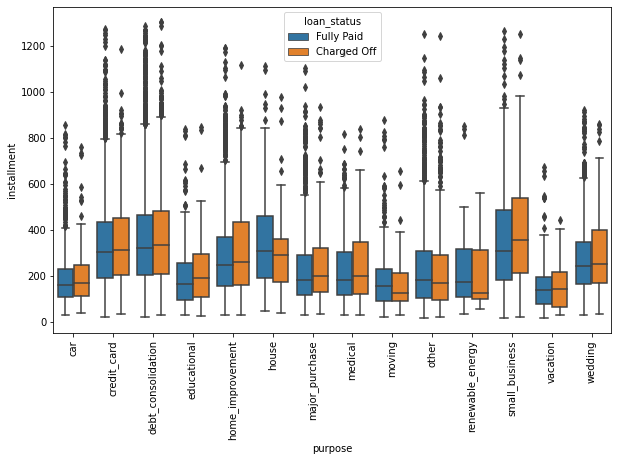

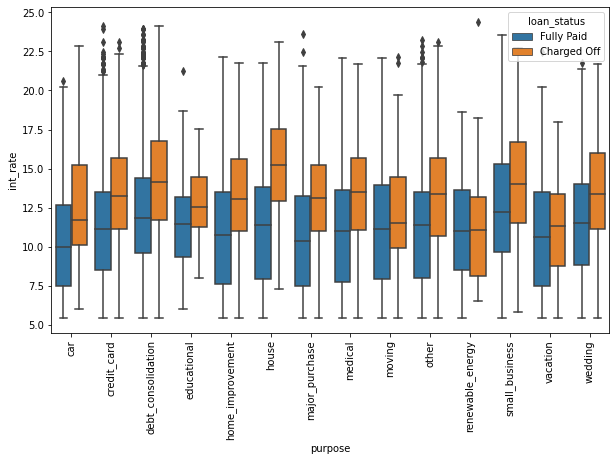

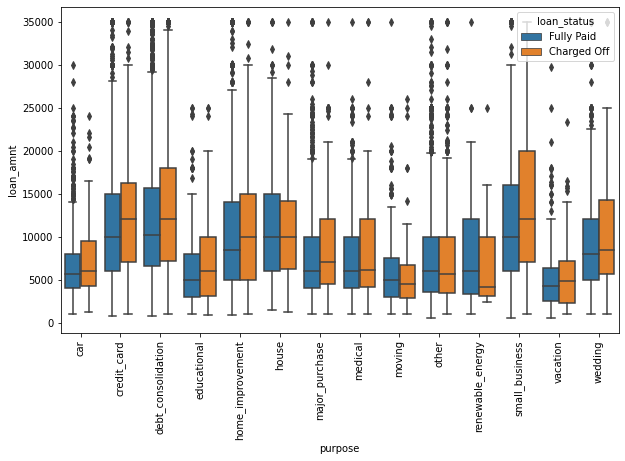

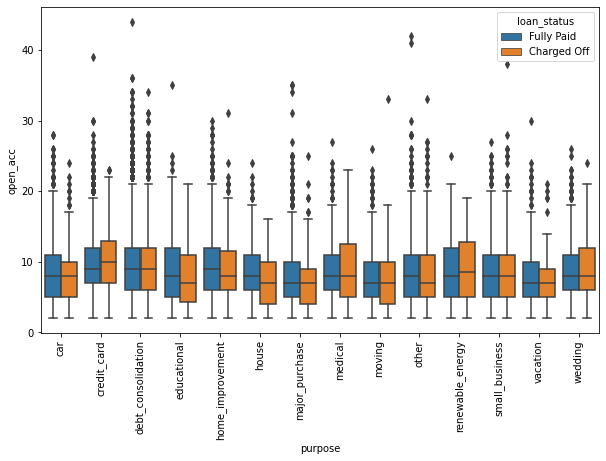

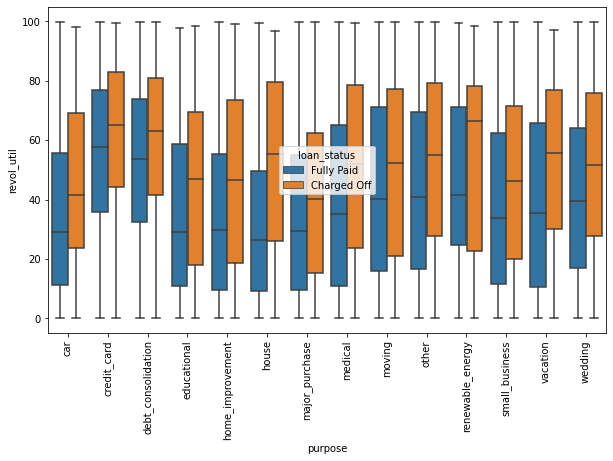

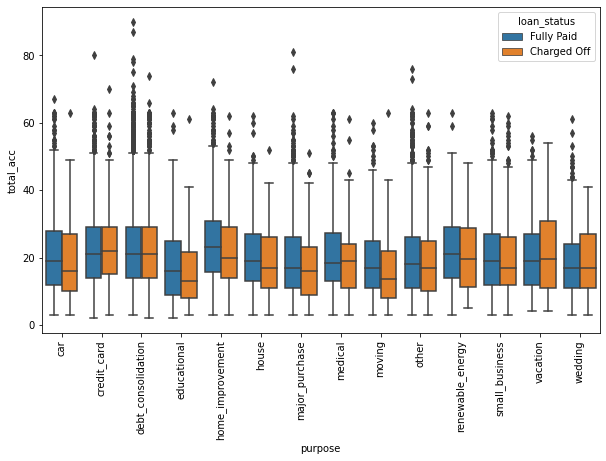

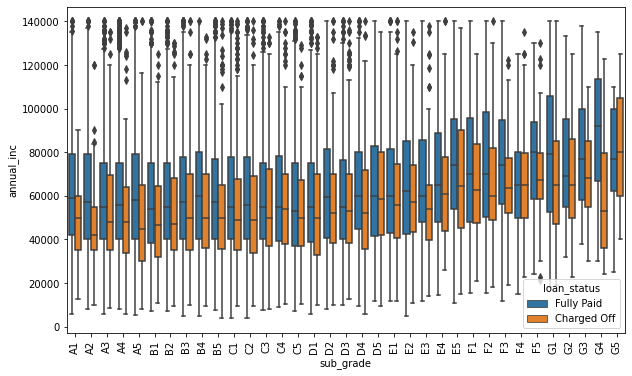

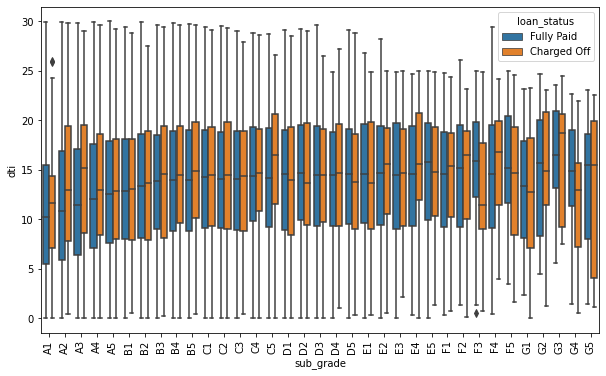

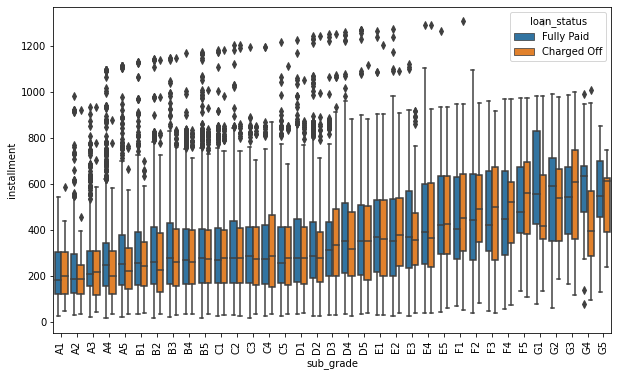

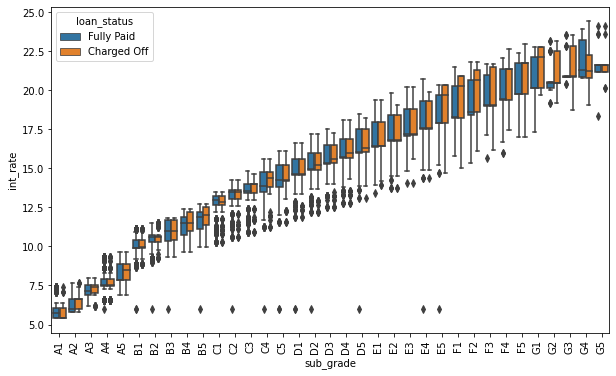

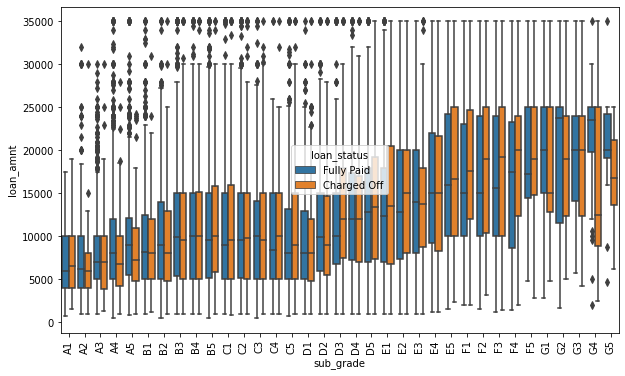

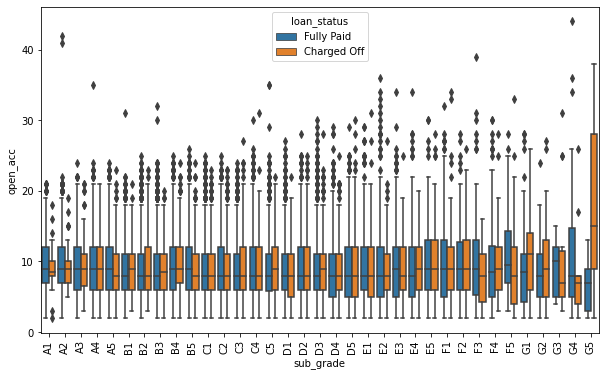

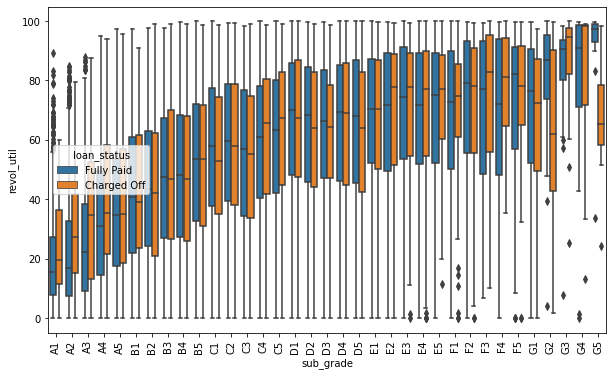

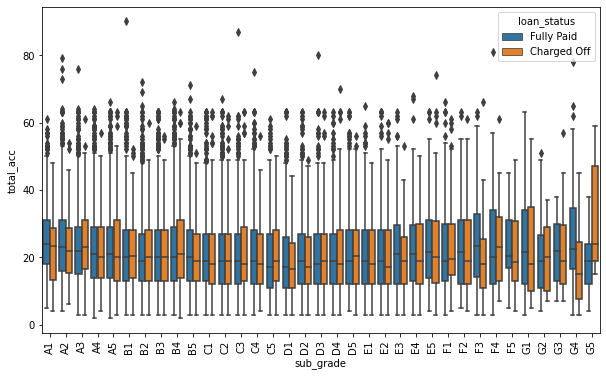

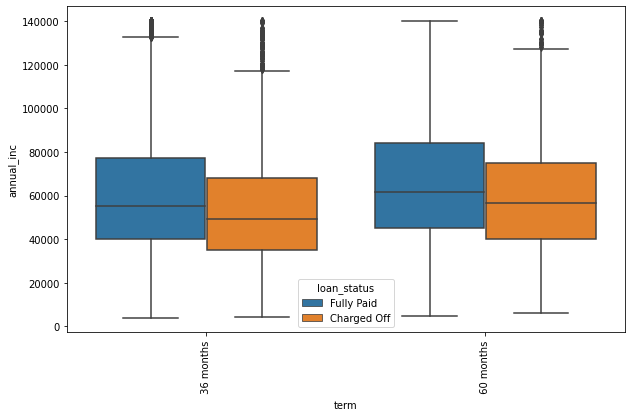

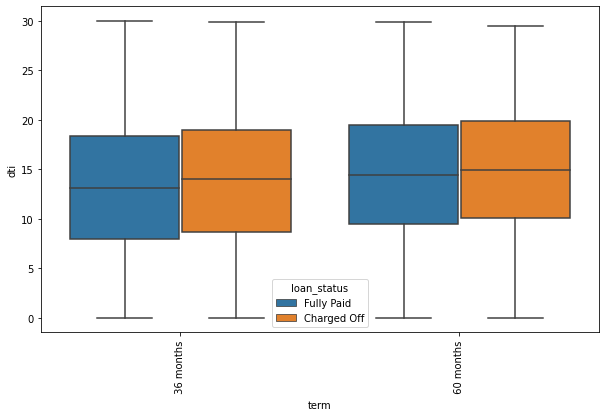

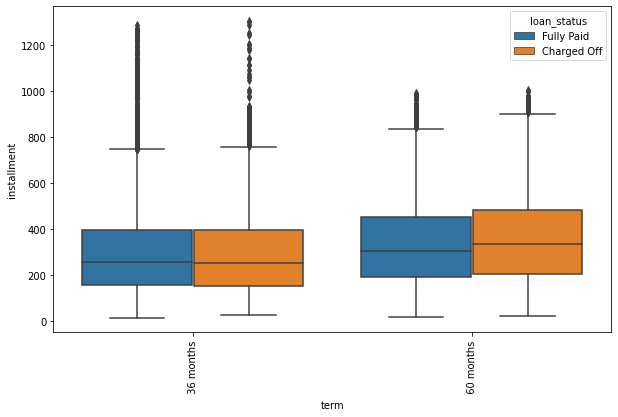

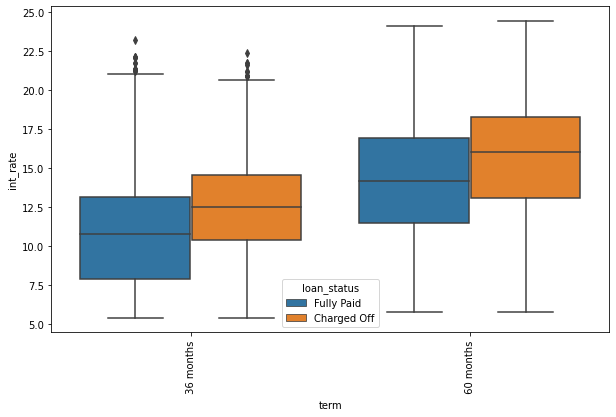

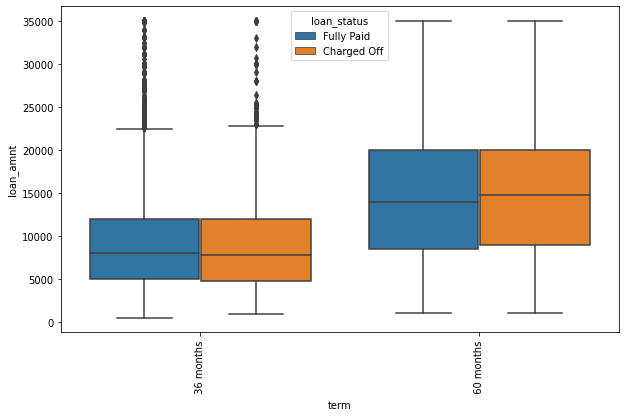

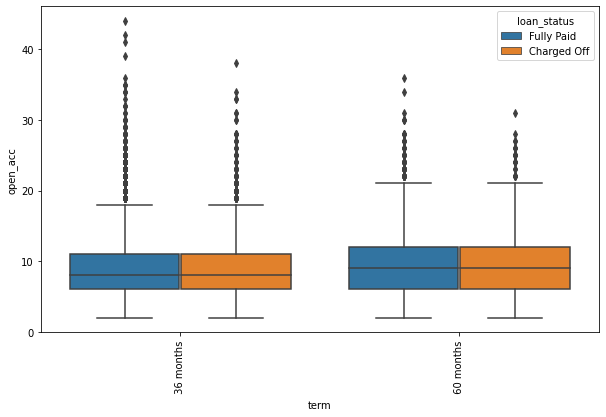

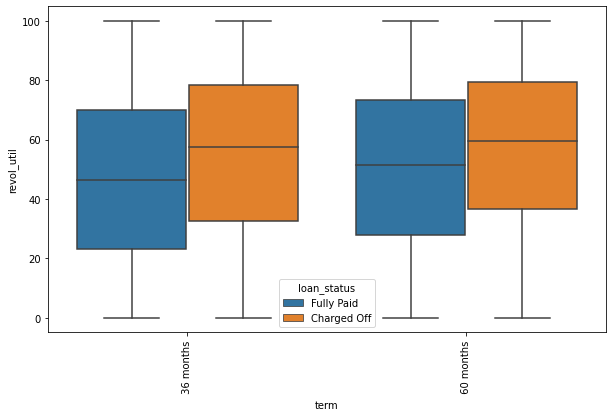

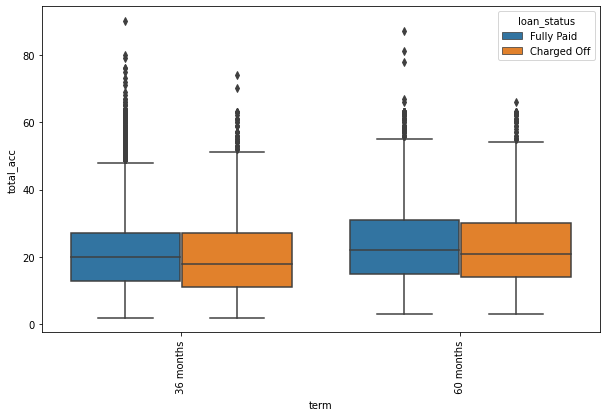

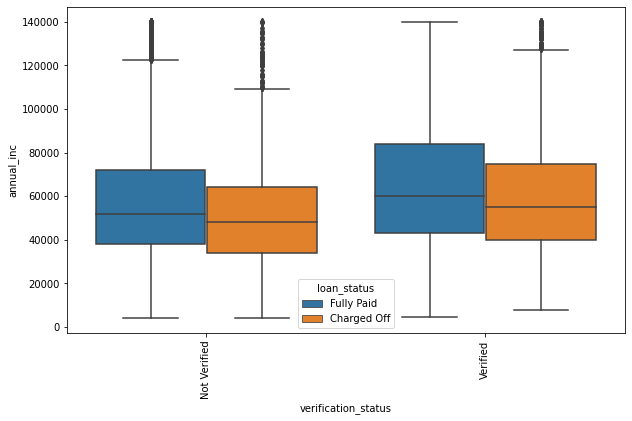

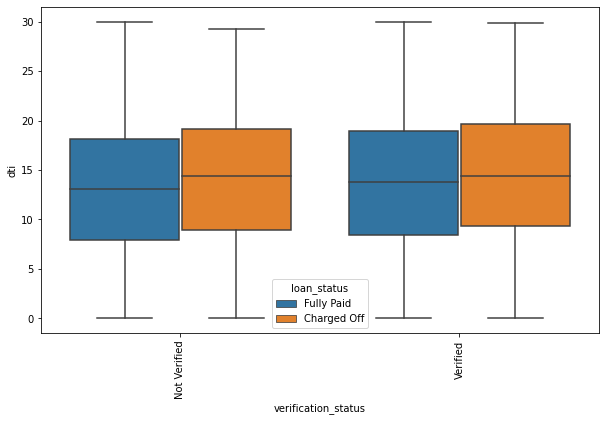

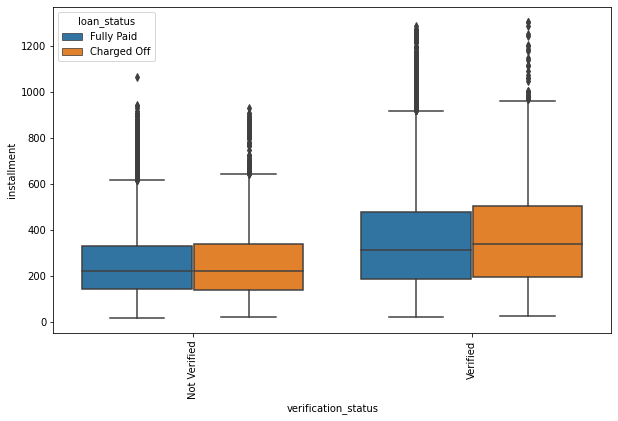

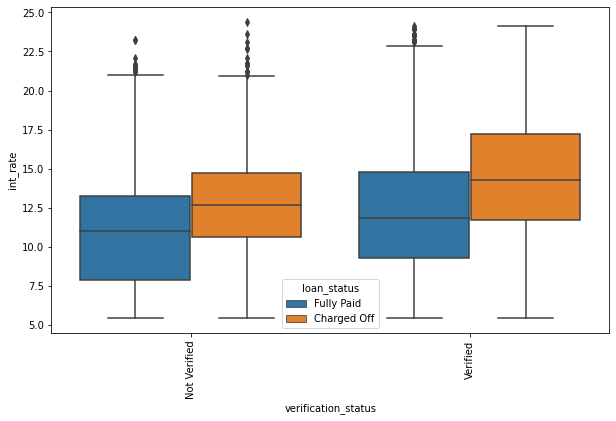

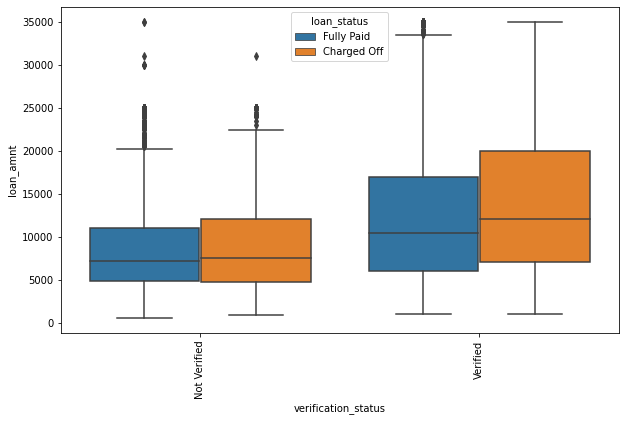

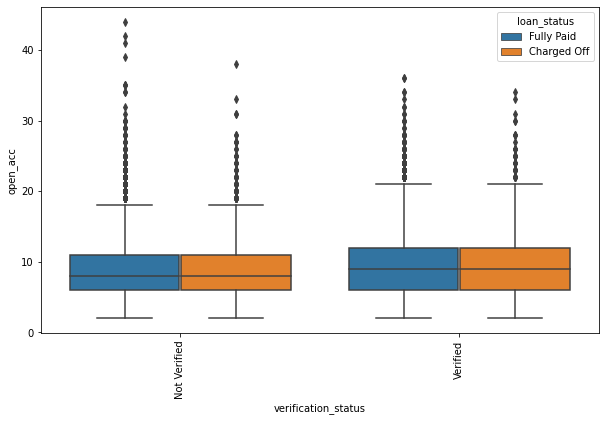

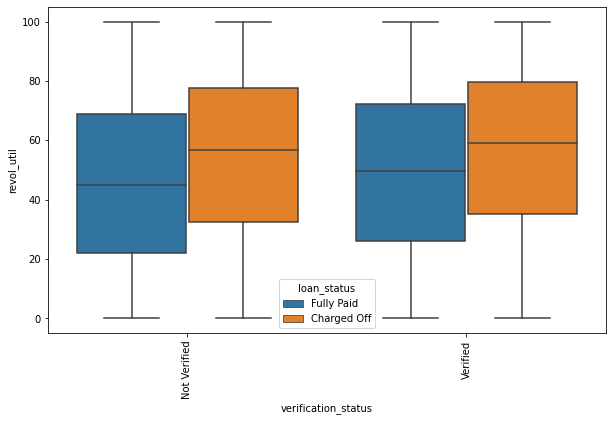

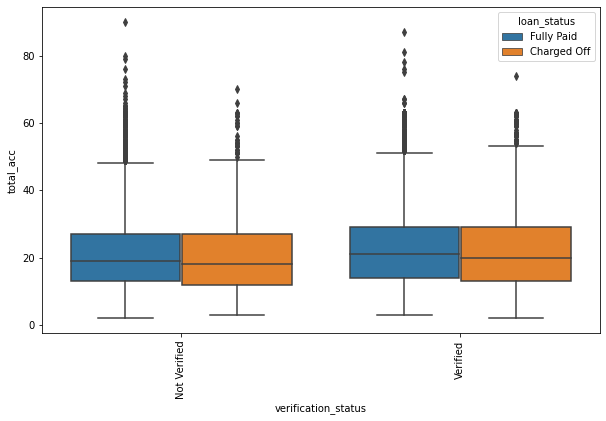

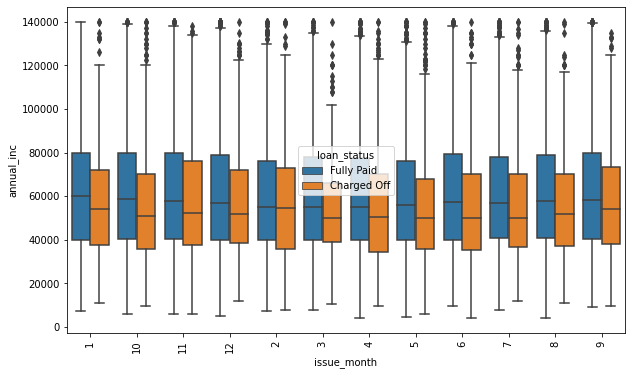

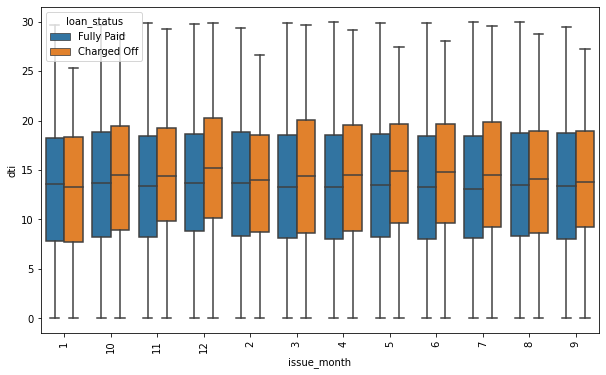

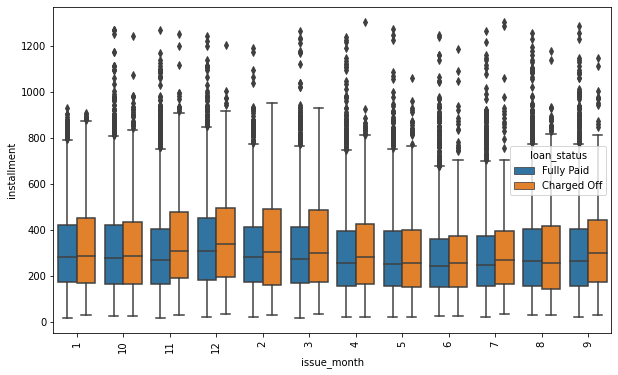

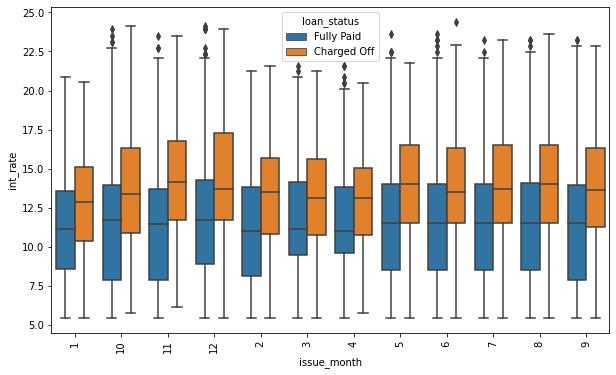

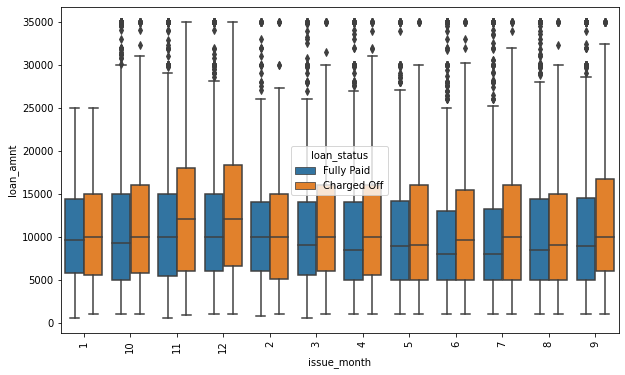

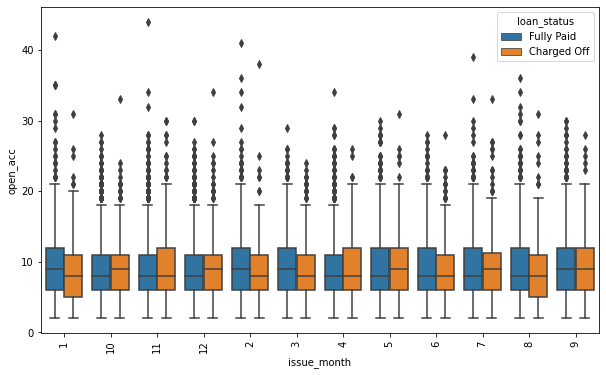

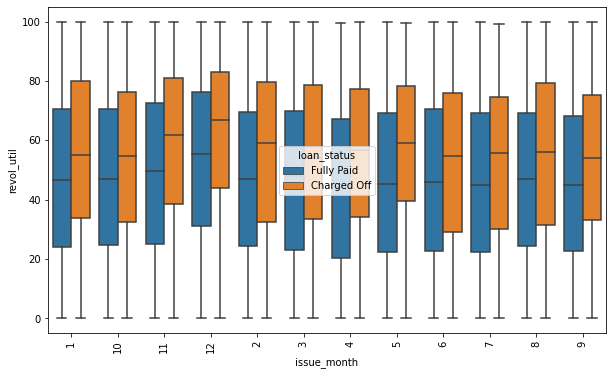

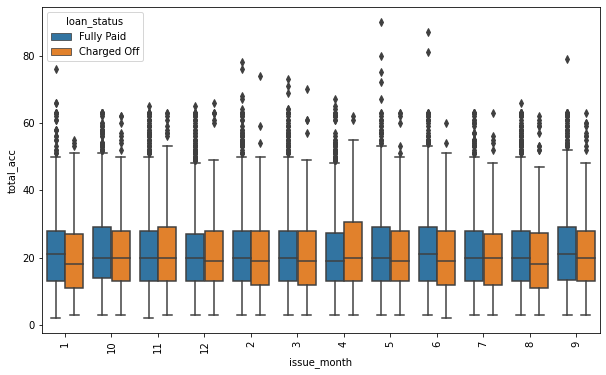

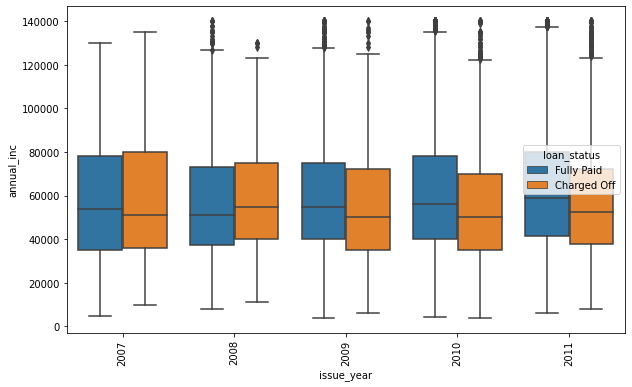

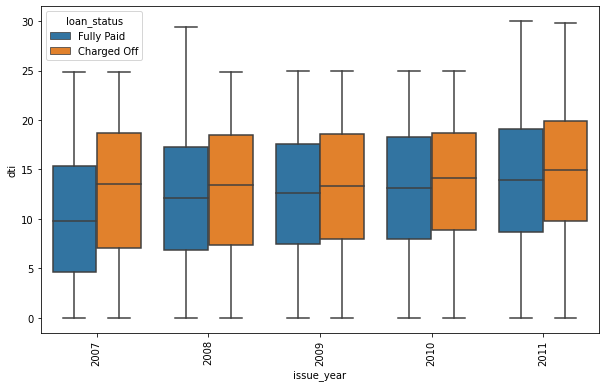

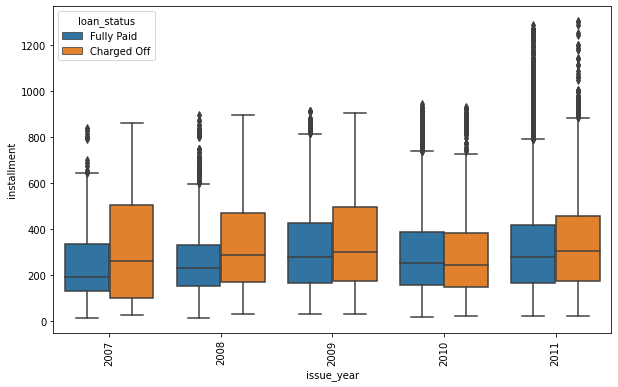

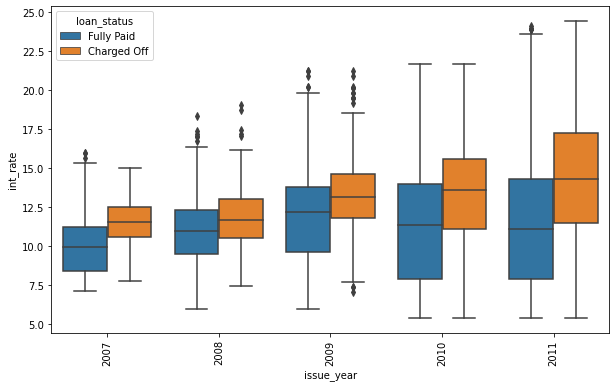

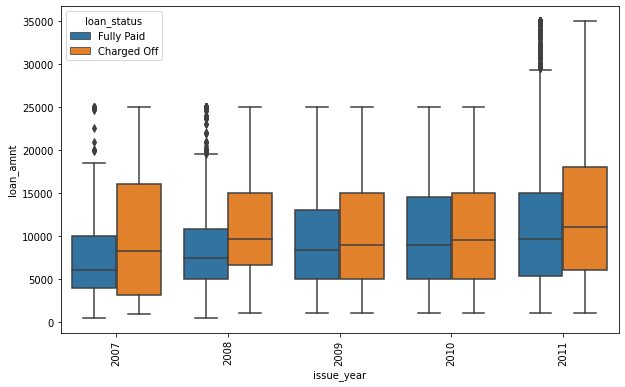

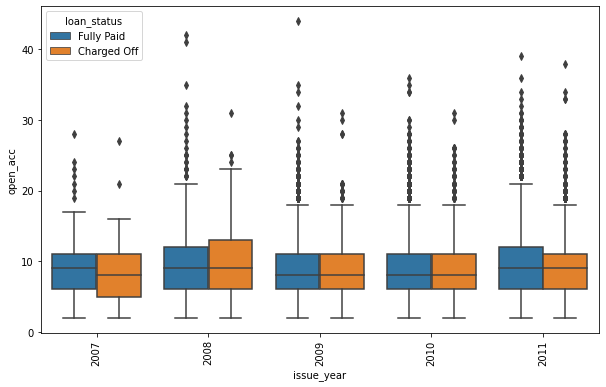

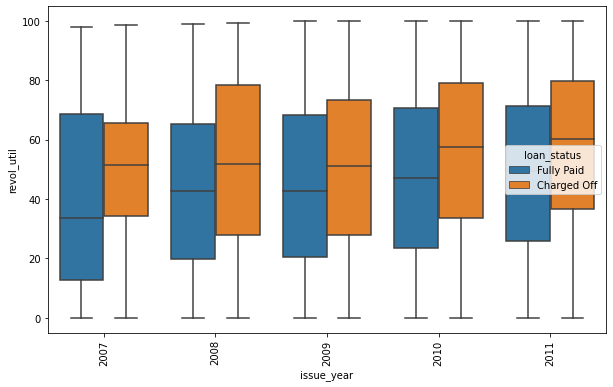

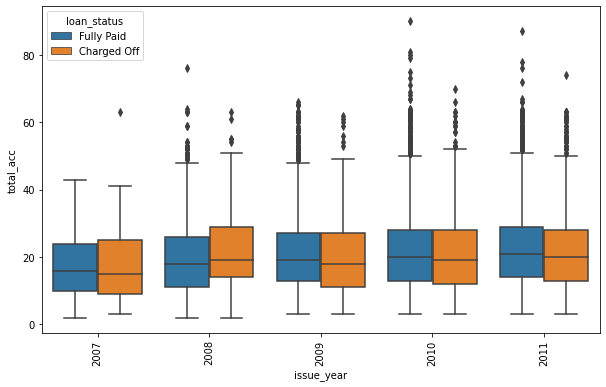

In [57]:
# Numerical vs Categorical

for col1 in cat_cols:
    for col2 in num_cols:
        axis_order = sorted(loan_df[col1].astype(str).unique())
        plt.figure(figsize=(10, 6))
        sns.boxplot(loan_df[col1].astype(str), 
                    loan_df[col2], hue = loan_df['loan_status'], order = axis_order)
        plt.xticks(rotation = 90)
        plt.show()

# Observations - 
# 1. annual_inc vs emp_length - As expected, annual income increases as the emp_length increases. And for each emp_length, 
#    the defaulters have a lower annual income.
# 2. The 'NA' values in annual income have lower incomes than the 0-3 years band.
# 3. int_rate vs grade - Interest Rates increase from loan grade A to G. Defaulters also seem to have higher interest rates 
#    throughout.
# 4. installment vs grade - Installments also are higher as we go from loan grade A to G. 
# 5. loan_amnt vs inq_last_6mths - Loan defaulters with 4+ inquiries in last 6 months have much higher loan amount than 
#    applicants with lower number of inquiries.
# 6. int_rate vs loan_status - Interest rates are much higher for the loan defaulters.
# 7. revol_util vs loan_status - Revolving credit utilization rate is higher for the loan defaulters as compared to the fully 
#    paid loan applicants.
# 10. open_acc vs pub_rec - No. of open credit lines are also higher for applicants with existing public derogatory records as 
#     compared to the applicants who have fully paid for the same band.
# 13. installment vs purpose - Installments are the highest for defaulters for small_business loans.
# 14. int_rate vs purpose - Interest rates are the highest for defaulters for house loans, followed by small_business and 
#     debt_consolidation loans.
# 15. loan_amount vs purpose - Loan amounts are the highest for defaulters for small_business, followed by debt_consolidation 
#     and credit card loans.
# 16. int_rate vs term - Interest for defaulters are much higher for loans with 60 months' term.
# 17. loan_amnt vs term - Loan amount is much higher for loans with 60 months' term.
# 18. int_rate vs issue_year - Interest rates have seen an increasing trend across years and are the highest for the loan 
#     defaulters in 2011.

## Multi-variate Analysis

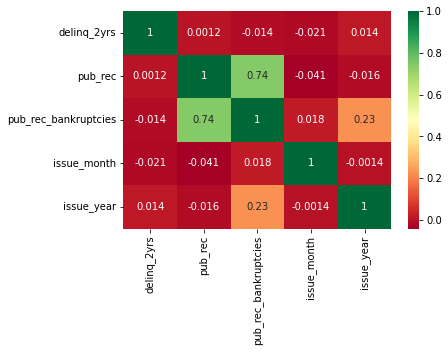

In [58]:
# Multi-variate analysis

# Numerical Columns for all defaulters

sns.heatmap(loan_defaulters_df[cat_cols].corr(), annot=True, cmap='RdYlGn')
plt.show()

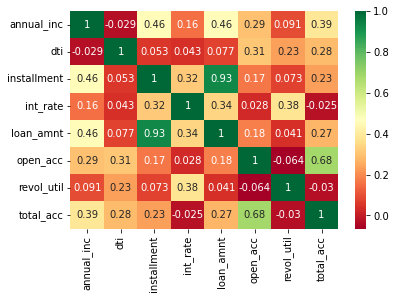

In [59]:
# Categorical Columns for all defaulters

sns.heatmap(loan_defaulters_df[num_cols].corr(), annot=True, cmap='RdYlGn')
plt.show()

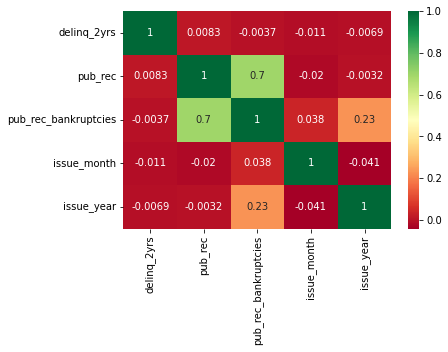

In [60]:
# Numerical Columns for all Fully paid customers

sns.heatmap(loan_fully_paid_df[cat_cols].corr(), annot=True, cmap='RdYlGn')
plt.show()

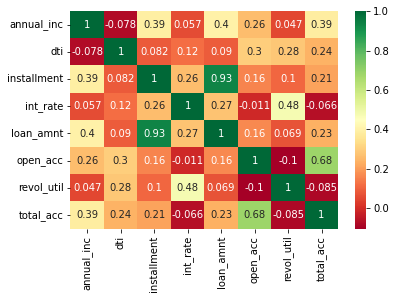

In [61]:
# Categorical Columns for all Fully paid customers

sns.heatmap(loan_fully_paid_df[num_cols].corr(), annot=True, cmap='RdYlGn')
plt.show()

In [62]:
# Observations - 
# The correlations between numerical and categorical columns are not much to read about.

In [63]:
# Key Drivers for loan defaults
# 1. States like CA and NE.
# 2. Loan applicants with 1-3 years and 10+ years of experience.
# 3. Loan grades with lower credit quality.
# 4. Loan applicants with rented accommodation.
# 5. Loan purpose – Especially small businesses and debt consolidation
# 6. Loan applicants with 60 month’ term (higher loan amounts and interest rates).
# 7. Lower credit quality sub-grades, especially F5 (higher loan amounts and interest rates).
# 8. High installments for loan applicants with 4+ inquiries in last 6 months.
# 9. High DTI.